In [27]:
import pandas as pd
import json
import pywt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
import os
from scipy import signal



In [ ]:
def cargar_datos_json(ruta_archivo):
    with open(ruta_archivo, 'r') as archivo:
        datos = json.load(archivo)
    return pd.DataFrame(datos)

ruta_archivo = 'data_prueba/Aire.10m.BSG.A01-A11.2022/Aire.BSG.A01-A11.2022.json'
df = cargar_datos_json(ruta_archivo)

In [6]:
columnas_interes = ['dateObserved', 'entityId', 'NO2Value', 'PM10Value', 'PM25Value', 'O3Value', 'SO2Value']
df = df[columnas_interes]

In [ ]:
df['dateObserved'] = pd.to_datetime(df['dateObserved'].str['$date'], errors='coerce')
df.set_index('dateObserved', inplace=True)
df = df.sort_index()

In [ ]:
columnas_numericas = ['NO2Value', 'PM10Value', 'PM25Value', 'O3Value', 'SO2Value']


for columna in columnas_numericas:
    print(f"Valores únicos en la columna {columna}:")
    print(df[columna].unique()[:10])  # Muestra solo los primeros 10 valores únicos

for columna in columnas_numericas:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')

print("\nTipos de datos después de intentar la conversión:")
print(df.dtypes)

try:
    df_numeric = df[columnas_numericas]  
    df_resampled = df_numeric.resample('10T').mean().interpolate()
    print("\nPrimeras filas del DataFrame después del resampleo:")
    print(df_resampled.head())
except Exception as e:
    print(f"Error al resamplear: {e}")


Valores únicos en la columna NO2Value:
['27' '30' '52' '40' '25' '68' '33' '64' '50' '39']
Valores únicos en la columna PM10Value:
['61' '80' '54' '43' nan '68' '63' '88' '57' '45']
Valores únicos en la columna PM25Value:
['42' '59' '65' '44' nan '55' '77' '76' '68' '45']
Valores únicos en la columna O3Value:
['14' '5' '16' '2' '15' nan '13' '7' '23' '6']
Valores únicos en la columna SO2Value:
['2' '1' '3' '6' nan '7' '5' '4' '0' '8']

Tipos de datos después de intentar la conversión:
entityId      object
NO2Value       int64
PM10Value    float64
PM25Value    float64
O3Value      float64
SO2Value     float64
dtype: object

Primeras filas del DataFrame después del resampleo:
                           NO2Value  PM10Value  PM25Value  O3Value  SO2Value
dateObserved                                                                
2022-01-01 00:00:00+00:00    38.625  65.285714  57.285714     10.4       2.8
2022-01-01 00:10:00+00:00    36.375  67.000000  58.428571     10.6       3.0
2022-01-0

C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\3744726167.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_numeric.resample('10T').mean().interpolate()


# EDA

In [ ]:

resampled_df = df_resampled

missing_values = resampled_df.isnull().sum()

resampled_df = resampled_df.interpolate()


questions = [
    "1. ¿Cuál es la distribución de cada contaminante? (Distribución de frecuencias)",
    "2. ¿Qué valores máximos y mínimos se registran para cada contaminante? (Análisis de rangos)",
    "3. ¿Existen variaciones significativas en los contaminantes durante el día? (Patrones horarios)",
    "4. ¿Se observan diferencias en los niveles de contaminación entre días de la semana? (Patrones semanales)",
    "5. ¿Cómo han evolucionado los niveles de cada contaminante a lo largo del tiempo? (Tendencias temporales)",
    "6. ¿Existe correlación entre los diferentes contaminantes? (Análisis de correlación)",
    "7. ¿Existen patrones estacionales en las series temporales de los contaminantes? (Estacionalidad)",
    "8. ¿Cuáles son las variaciones entre los valores promedio, máximo y mínimo de cada contaminante? (Comparación de estadísticas descriptivas)"
]

questions, missing_values


(['1. ¿Cuál es la distribución de cada contaminante? (Distribución de frecuencias)',
  '2. ¿Qué valores máximos y mínimos se registran para cada contaminante? (Análisis de rangos)',
  '3. ¿Existen variaciones significativas en los contaminantes durante el día? (Patrones horarios)',
  '4. ¿Se observan diferencias en los niveles de contaminación entre días de la semana? (Patrones semanales)',
  '5. ¿Cómo han evolucionado los niveles de cada contaminante a lo largo del tiempo? (Tendencias temporales)',
  '6. ¿Existe correlación entre los diferentes contaminantes? (Análisis de correlación)',
  '7. ¿Existen patrones estacionales en las series temporales de los contaminantes? (Estacionalidad)',
  '8. ¿Cuáles son las variaciones entre los valores promedio, máximo y mínimo de cada contaminante? (Comparación de estadísticas descriptivas)'],
 NO2Value     0
 PM10Value    0
 PM25Value    0
 O3Value      0
 SO2Value     0
 dtype: int64)

1. Distribución de cada contaminante:


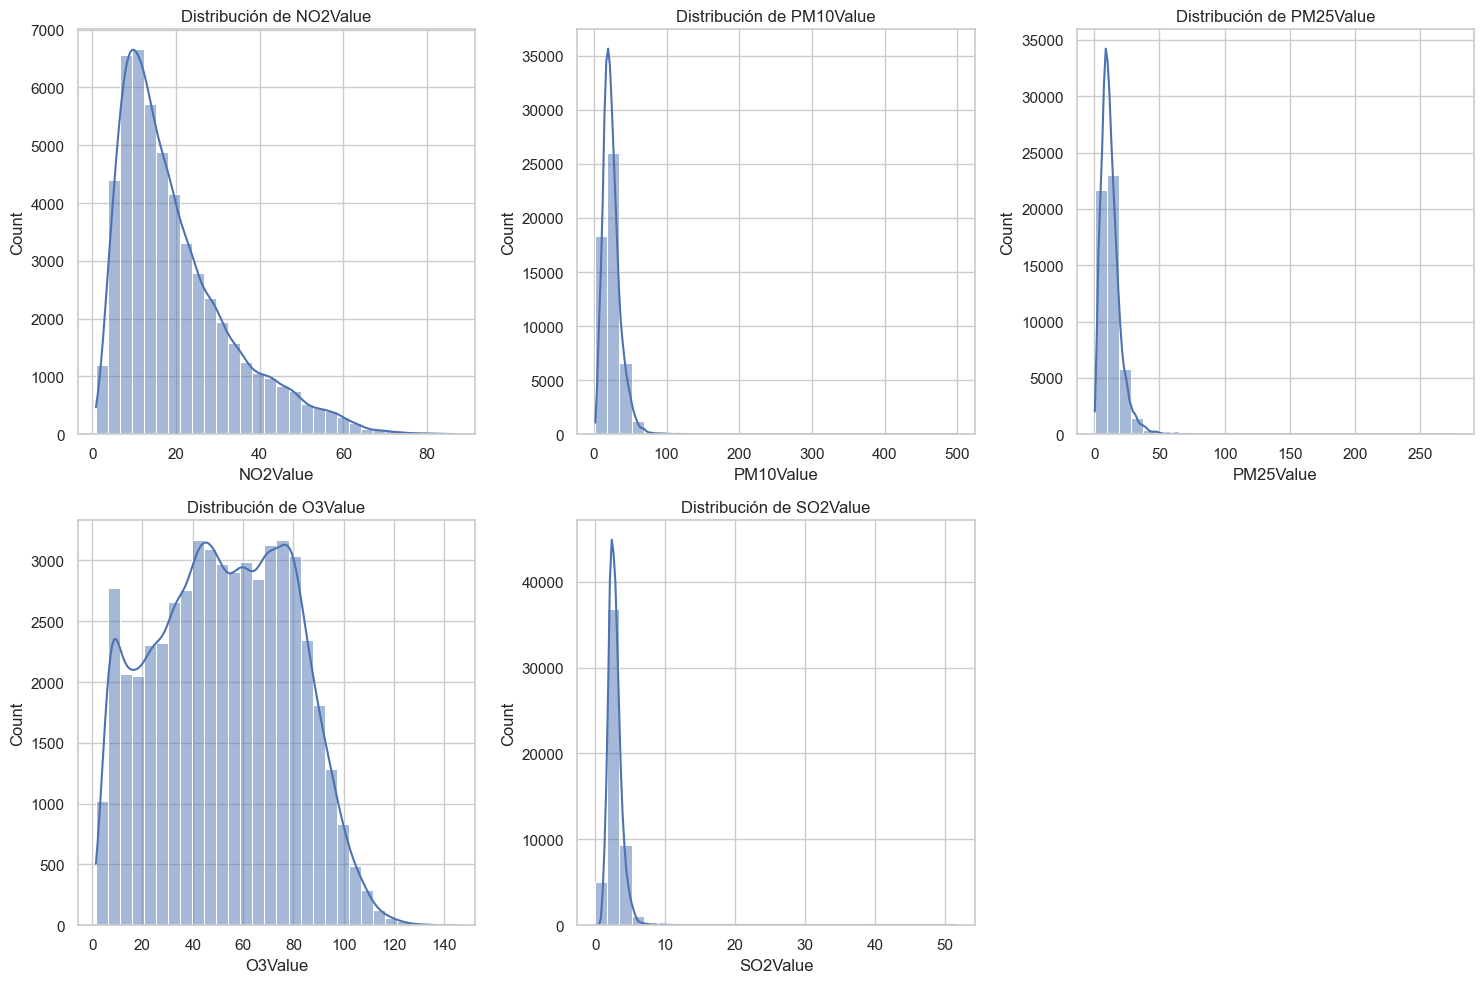

2. Valores máximos y mínimos de cada contaminante:
NO2Value - Max: 87.11111111111111, Min: 0.8888888888888888
PM10Value - Max: 498.75, Min: 2.142857142857143
PM25Value - Max: 277.3333333333333, Min: 0.5714285714285714
O3Value - Max: 145.0, Min: 1.5
SO2Value - Max: 51.666666666666664, Min: 0.0

3. Variación horaria de cada contaminante:


C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\2218372110.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x="hour", y=column, estimator='mean', ci='sd')
C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\2218372110.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x="hour", y=column, estimator='mean', ci='sd')
C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\2218372110.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x="hour", y=column, estimator='mean', ci='sd')
C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\2218372110.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x="hour", y=column, estimator='mean', ci='sd')
C:\Users\BorjaEsteveMolner\A

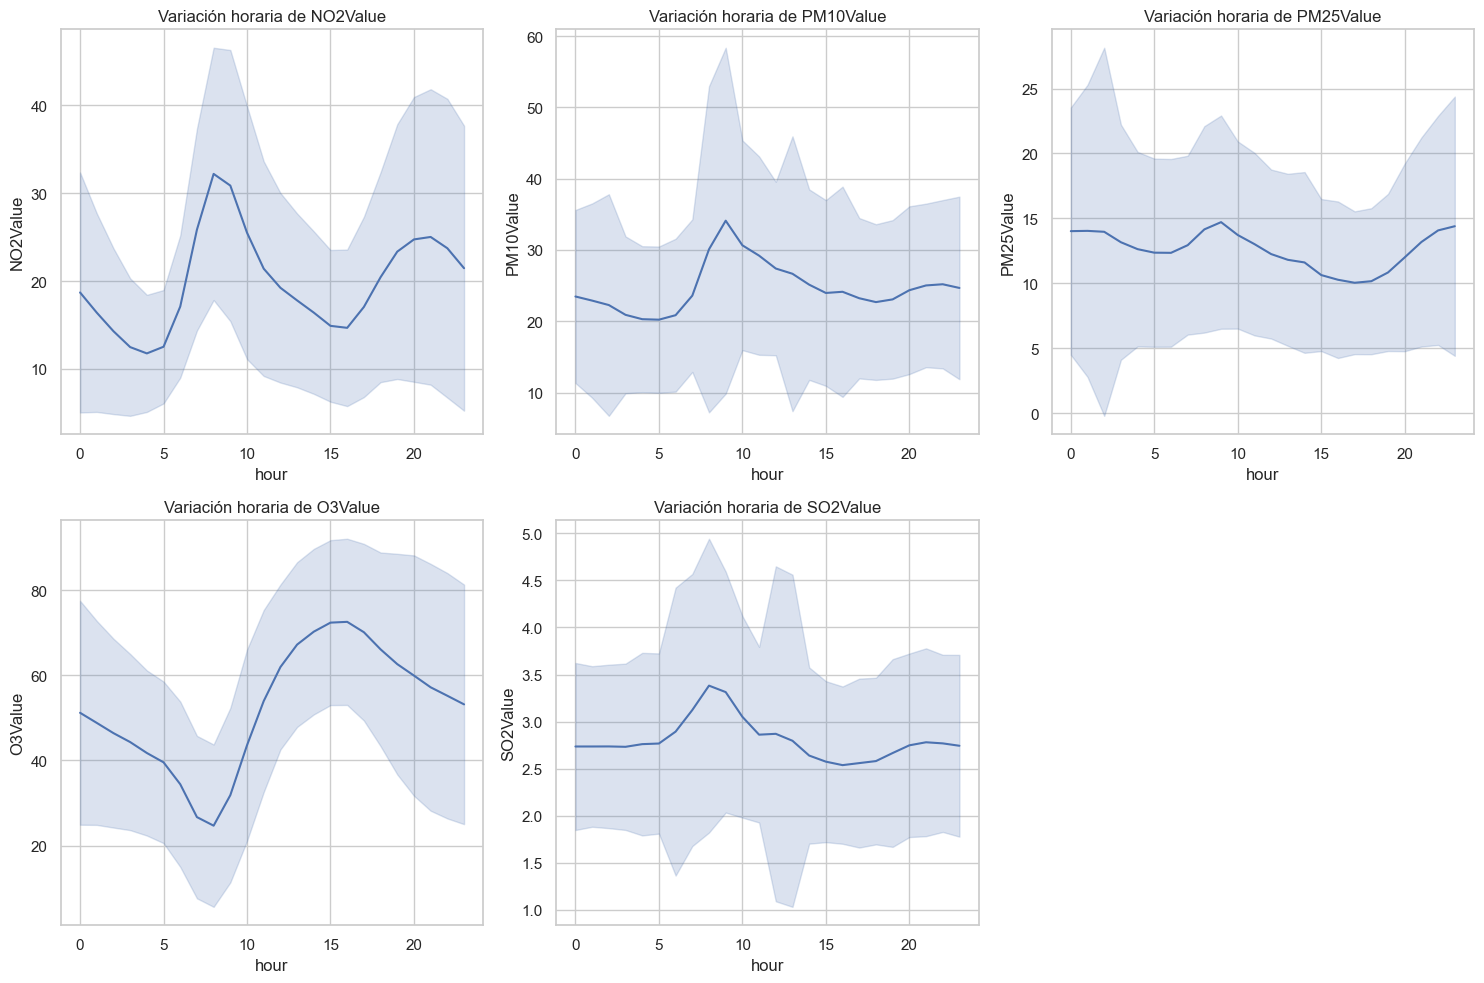


4. Variación semanal de cada contaminante:


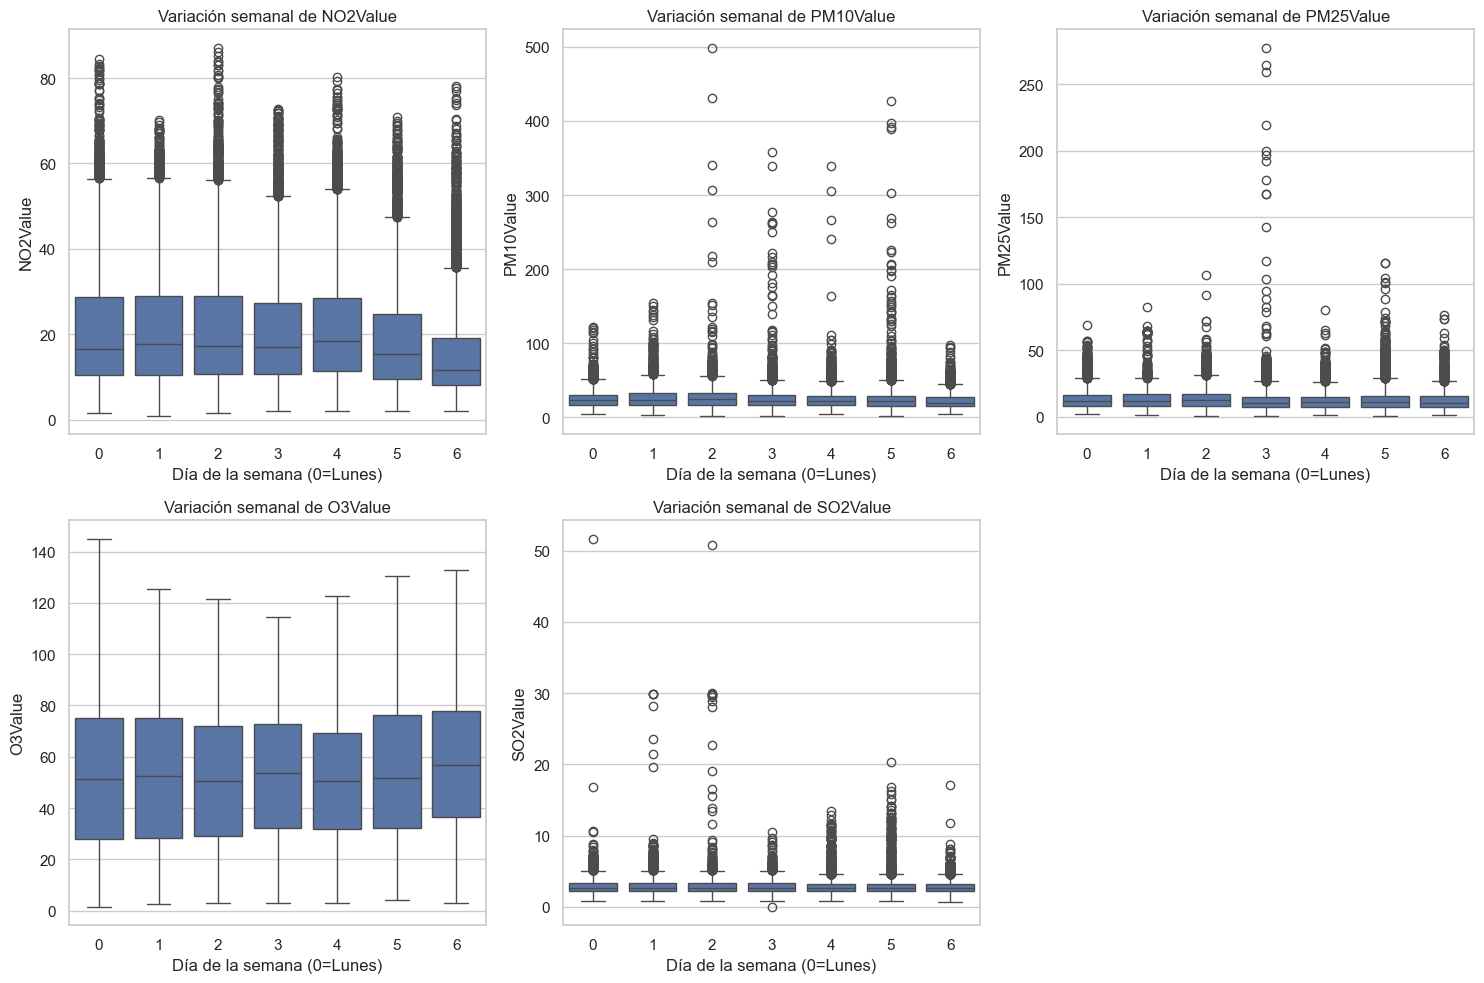


5. Evolución temporal de cada contaminante:


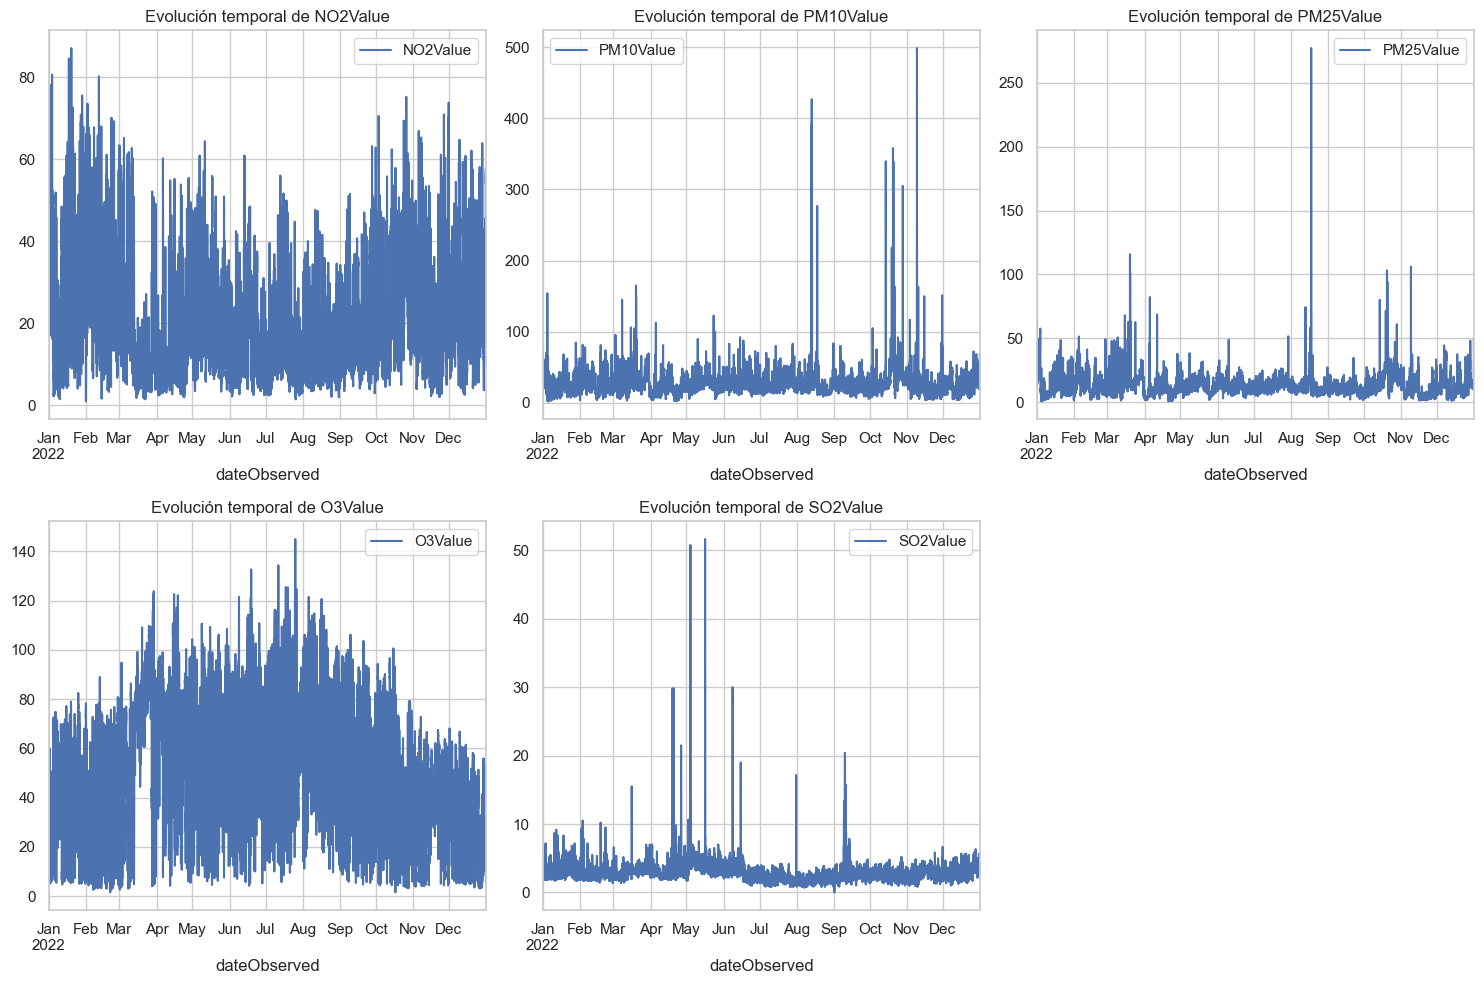


6. Correlación entre contaminantes:


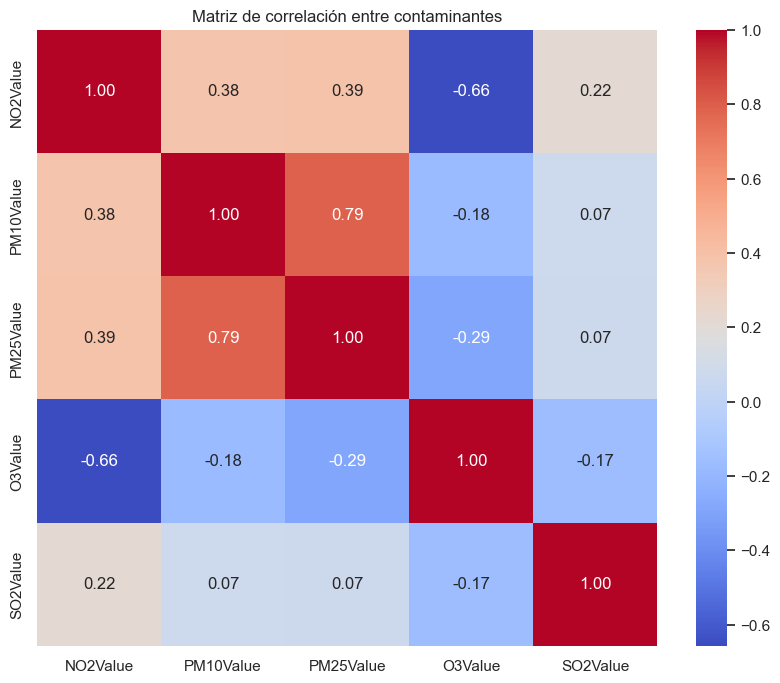


7. Estacionalidad en las series de contaminantes:


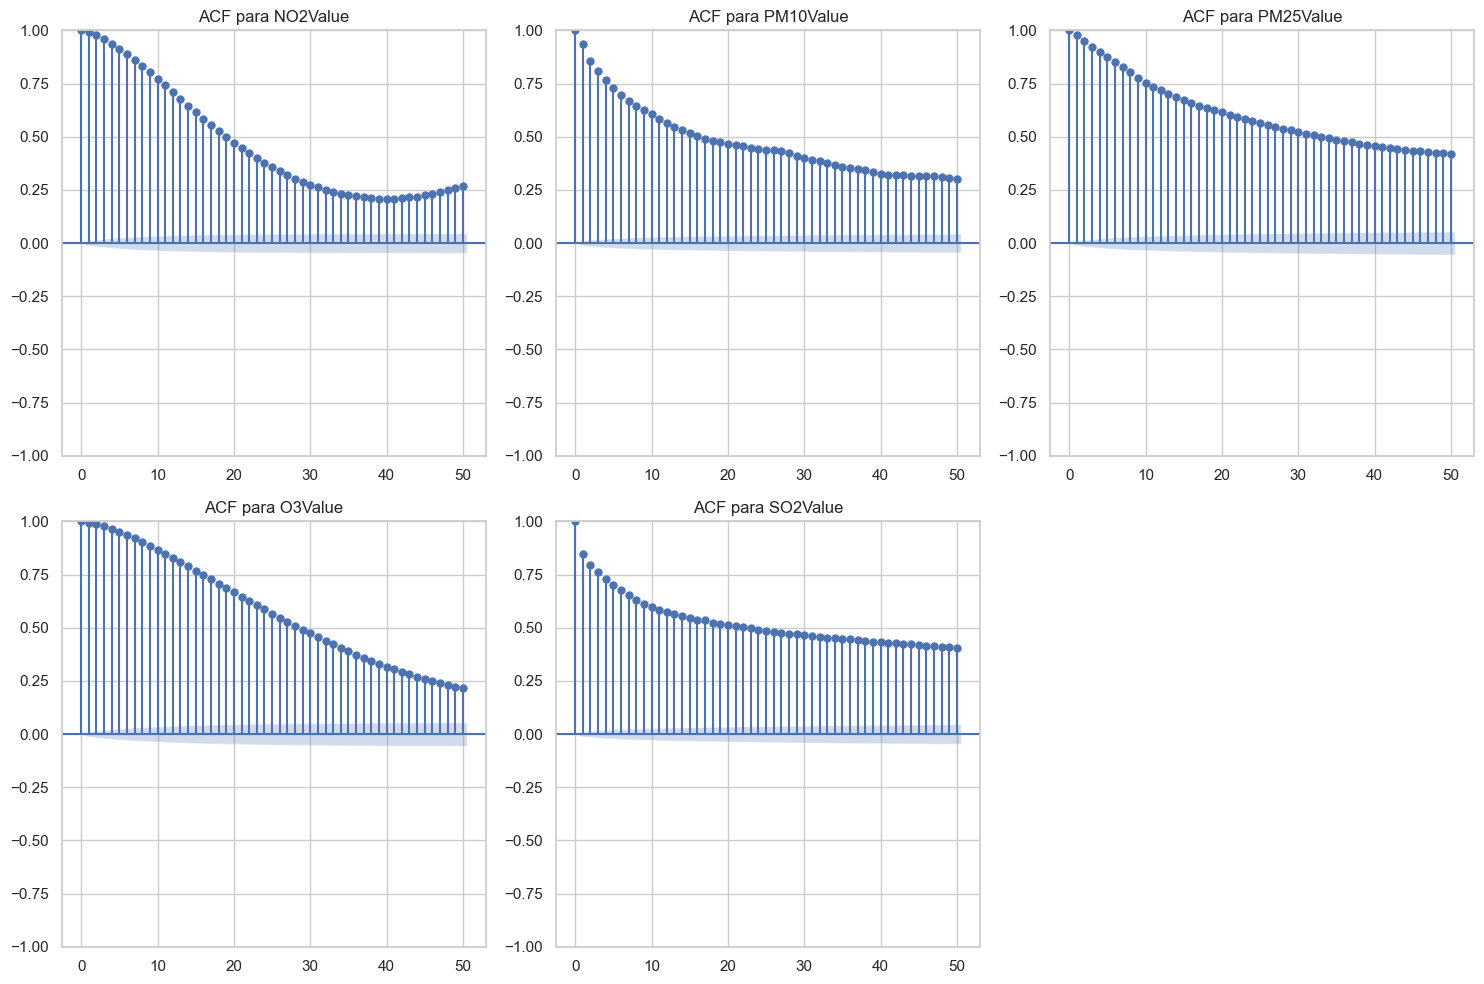


8. Estadísticas descriptivas de cada contaminante:
Estadísticas descriptivas de cada contaminante:
           NO2Value     PM10Value     PM25Value       O3Value      SO2Value
count  52560.000000  52560.000000  52560.000000  52560.000000  52560.000000
mean      19.906158     24.755717     12.597069     52.339320      2.806762
std       13.361749     14.378182      8.130537     26.576069      1.143793
min        0.888889      2.142857      0.571429      1.500000      0.000000
25%        9.909091     16.333333      7.555556     31.333333      2.166667
50%       16.211111     22.375000     11.111111     52.500000      2.666667
75%       26.454545     30.285714     15.875000     73.833333      3.333333
max       87.111111    498.750000    277.333333    145.000000     51.666667


In [ ]:


sns.set(style="whitegrid")

# 1. Distribución de cada contaminante
def plot_distribution(df, columns):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[column].dropna(), kde=True, bins=30)
        plt.title(f"Distribución de {column}")
    plt.tight_layout()
    plt.show()

# 2. Valores máximos y mínimos de cada contaminante
def display_max_min(df, columns):
    max_min_values = {col: {'max': df[col].max(), 'min': df[col].min()} for col in columns}
    for col, values in max_min_values.items():
        print(f"{col} - Max: {values['max']}, Min: {values['min']}")

# 3. Variaciones horarias
def plot_hourly_variation(df, columns):
    df['hour'] = df.index.hour  # Extraer la hora del día
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.lineplot(data=df, x="hour", y=column, estimator='mean', ci='sd')
        plt.title(f"Variación horaria de {column}")
    plt.tight_layout()
    plt.show()

# 4. Variaciones entre días de la semana
def plot_weekly_variation(df, columns):
    df['day_of_week'] = df.index.dayofweek  # Extraer el día de la semana (0=Lunes, 6=Domingo)
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(data=df, x="day_of_week", y=column)
        plt.title(f"Variación semanal de {column}")
        plt.xlabel("Día de la semana (0=Lunes)")
    plt.tight_layout()
    plt.show()

# 5. Evolución temporal de cada contaminante
def plot_time_series(df, columns):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        df[column].plot(ax=plt.gca(), label=column)
        plt.title(f"Evolución temporal de {column}")
        plt.legend()
    plt.tight_layout()
    plt.show()

# 6. Correlación entre contaminantes
def plot_correlation_matrix(df, columns):
    correlation_matrix = df[columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de correlación entre contaminantes")
    plt.show()

# 7. Estacionalidad (Usaremos ACF para observar patrones estacionales básicos)
from statsmodels.graphics.tsaplots import plot_acf
def plot_acf_for_columns(df, columns, lags=50):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        plot_acf(df[column].dropna(), lags=lags, ax=plt.gca())
        plt.title(f"ACF para {column}")
    plt.tight_layout()
    plt.show()

# 8. Comparación de estadísticas descriptivas
def display_descriptive_statistics(df, columns):
    descriptive_stats = df[columns].describe()
    print("Estadísticas descriptivas de cada contaminante:")
    print(descriptive_stats)

columns = ['NO2Value', 'PM10Value', 'PM25Value', 'O3Value', 'SO2Value']

print("1. Distribución de cada contaminante:")
plot_distribution(resampled_df, columns)

print("2. Valores máximos y mínimos de cada contaminante:")
display_max_min(resampled_df, columns)

print("\n3. Variación horaria de cada contaminante:")
plot_hourly_variation(resampled_df, columns)

print("\n4. Variación semanal de cada contaminante:")
plot_weekly_variation(resampled_df, columns)

print("\n5. Evolución temporal de cada contaminante:")
plot_time_series(resampled_df, columns)

print("\n6. Correlación entre contaminantes:")
plot_correlation_matrix(resampled_df, columns)

print("\n7. Estacionalidad en las series de contaminantes:")
plot_acf_for_columns(resampled_df, columns)

print("\n8. Estadísticas descriptivas de cada contaminante:")
display_descriptive_statistics(resampled_df, columns)


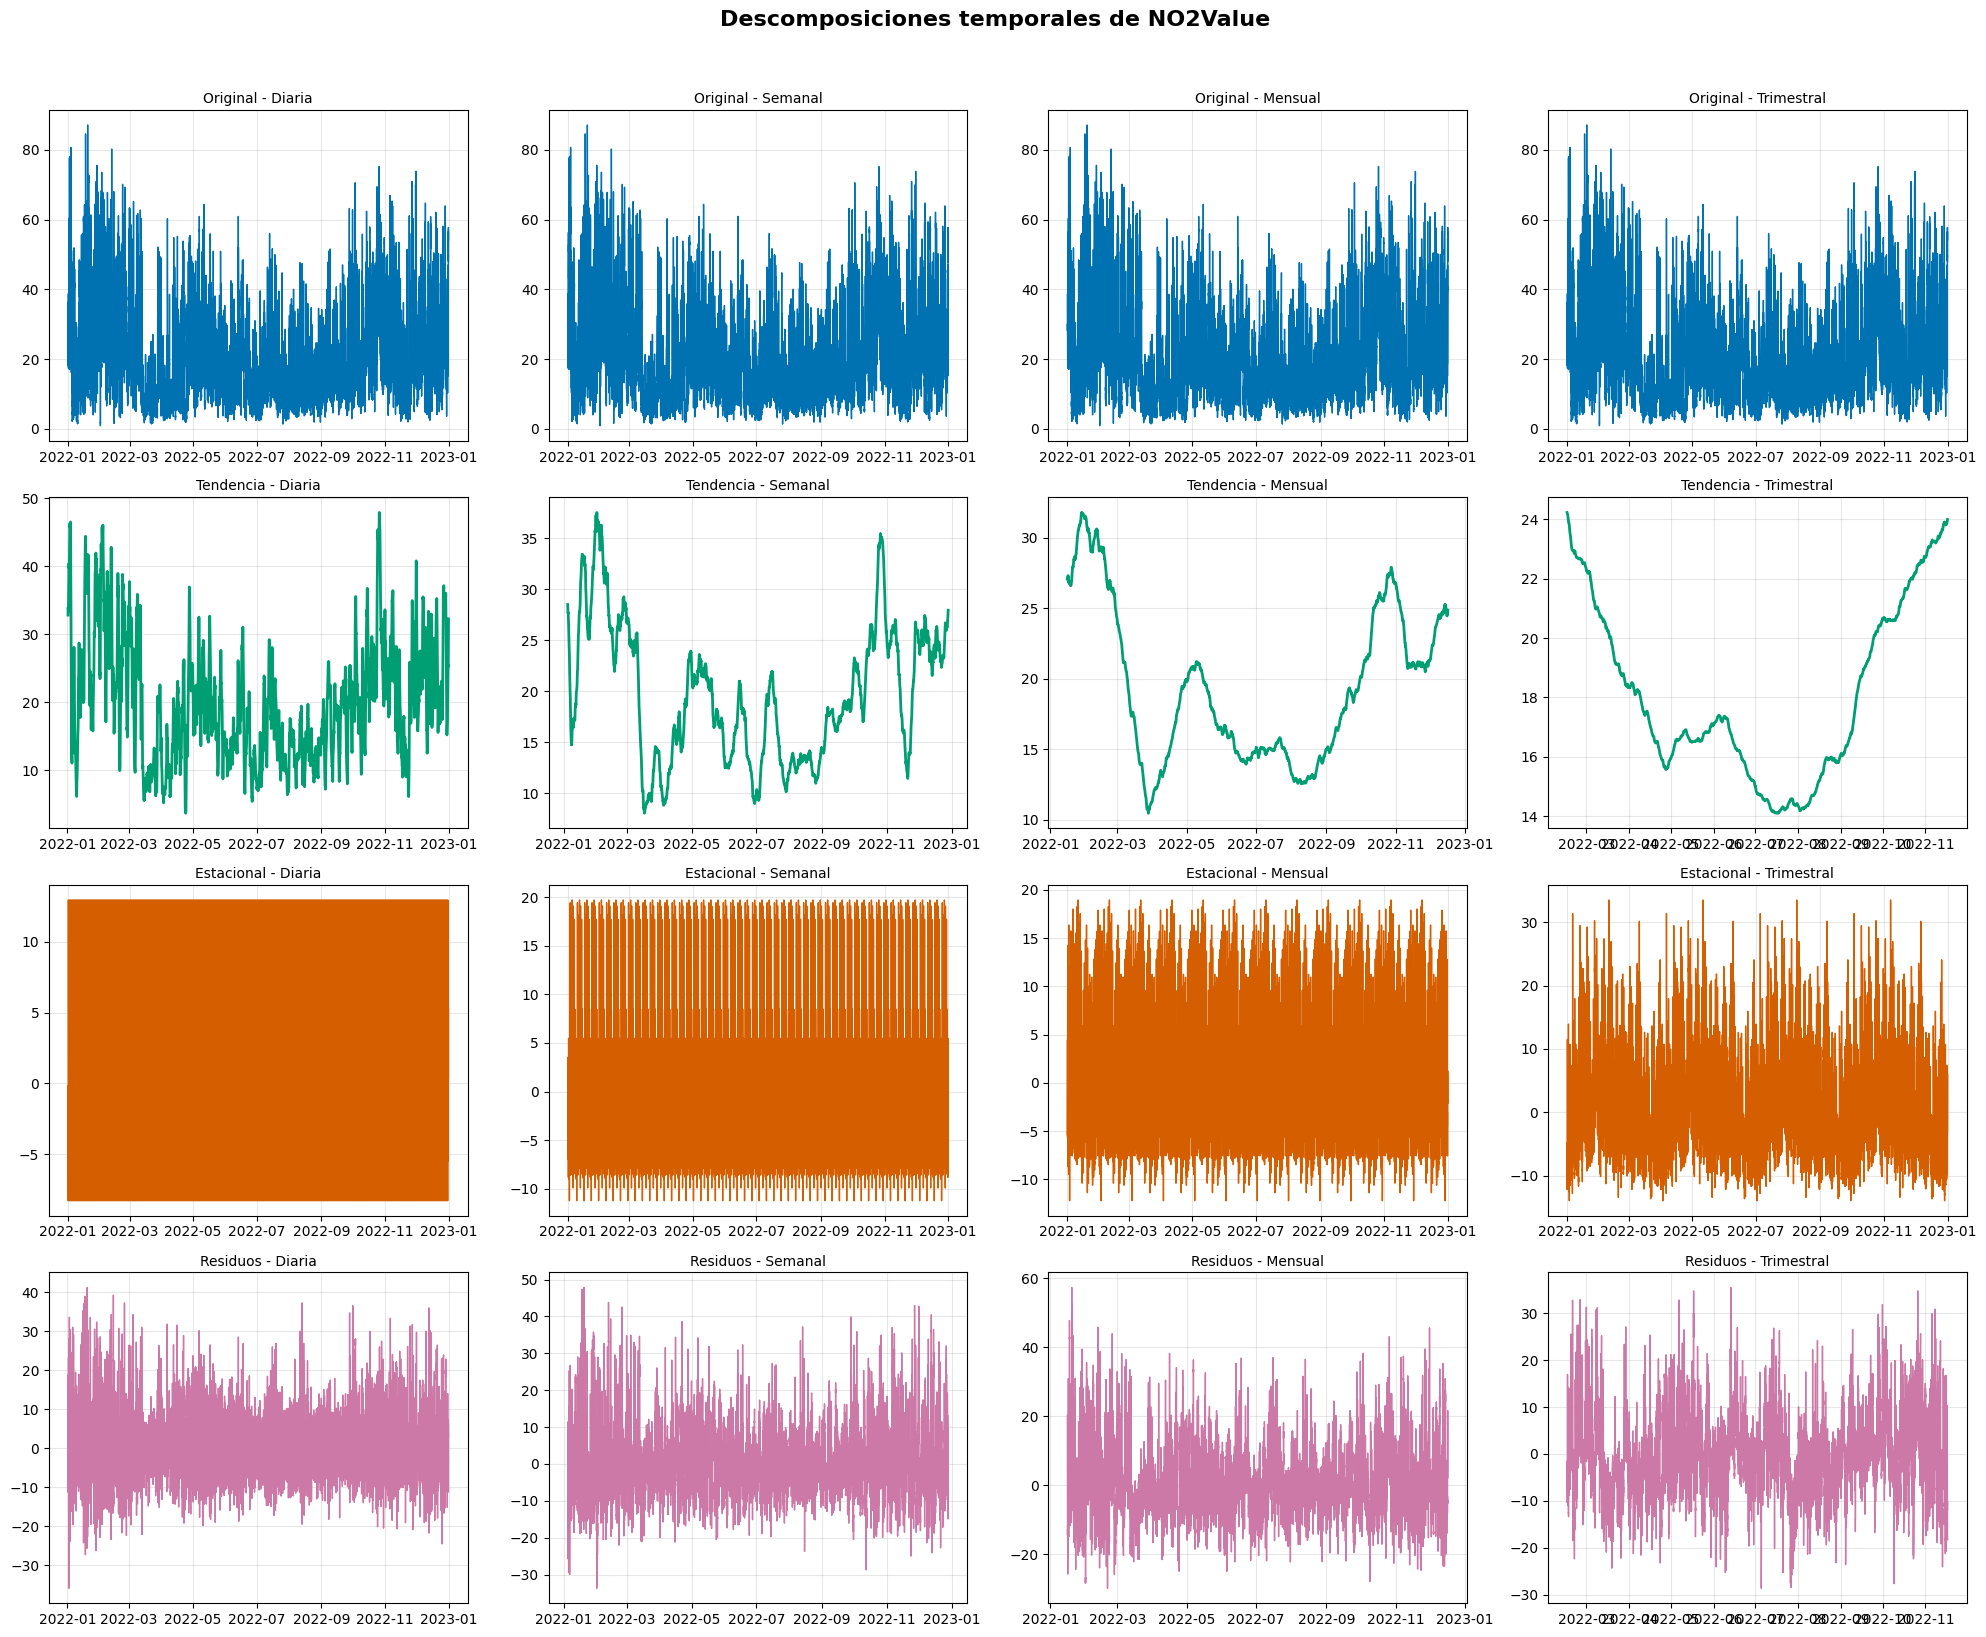

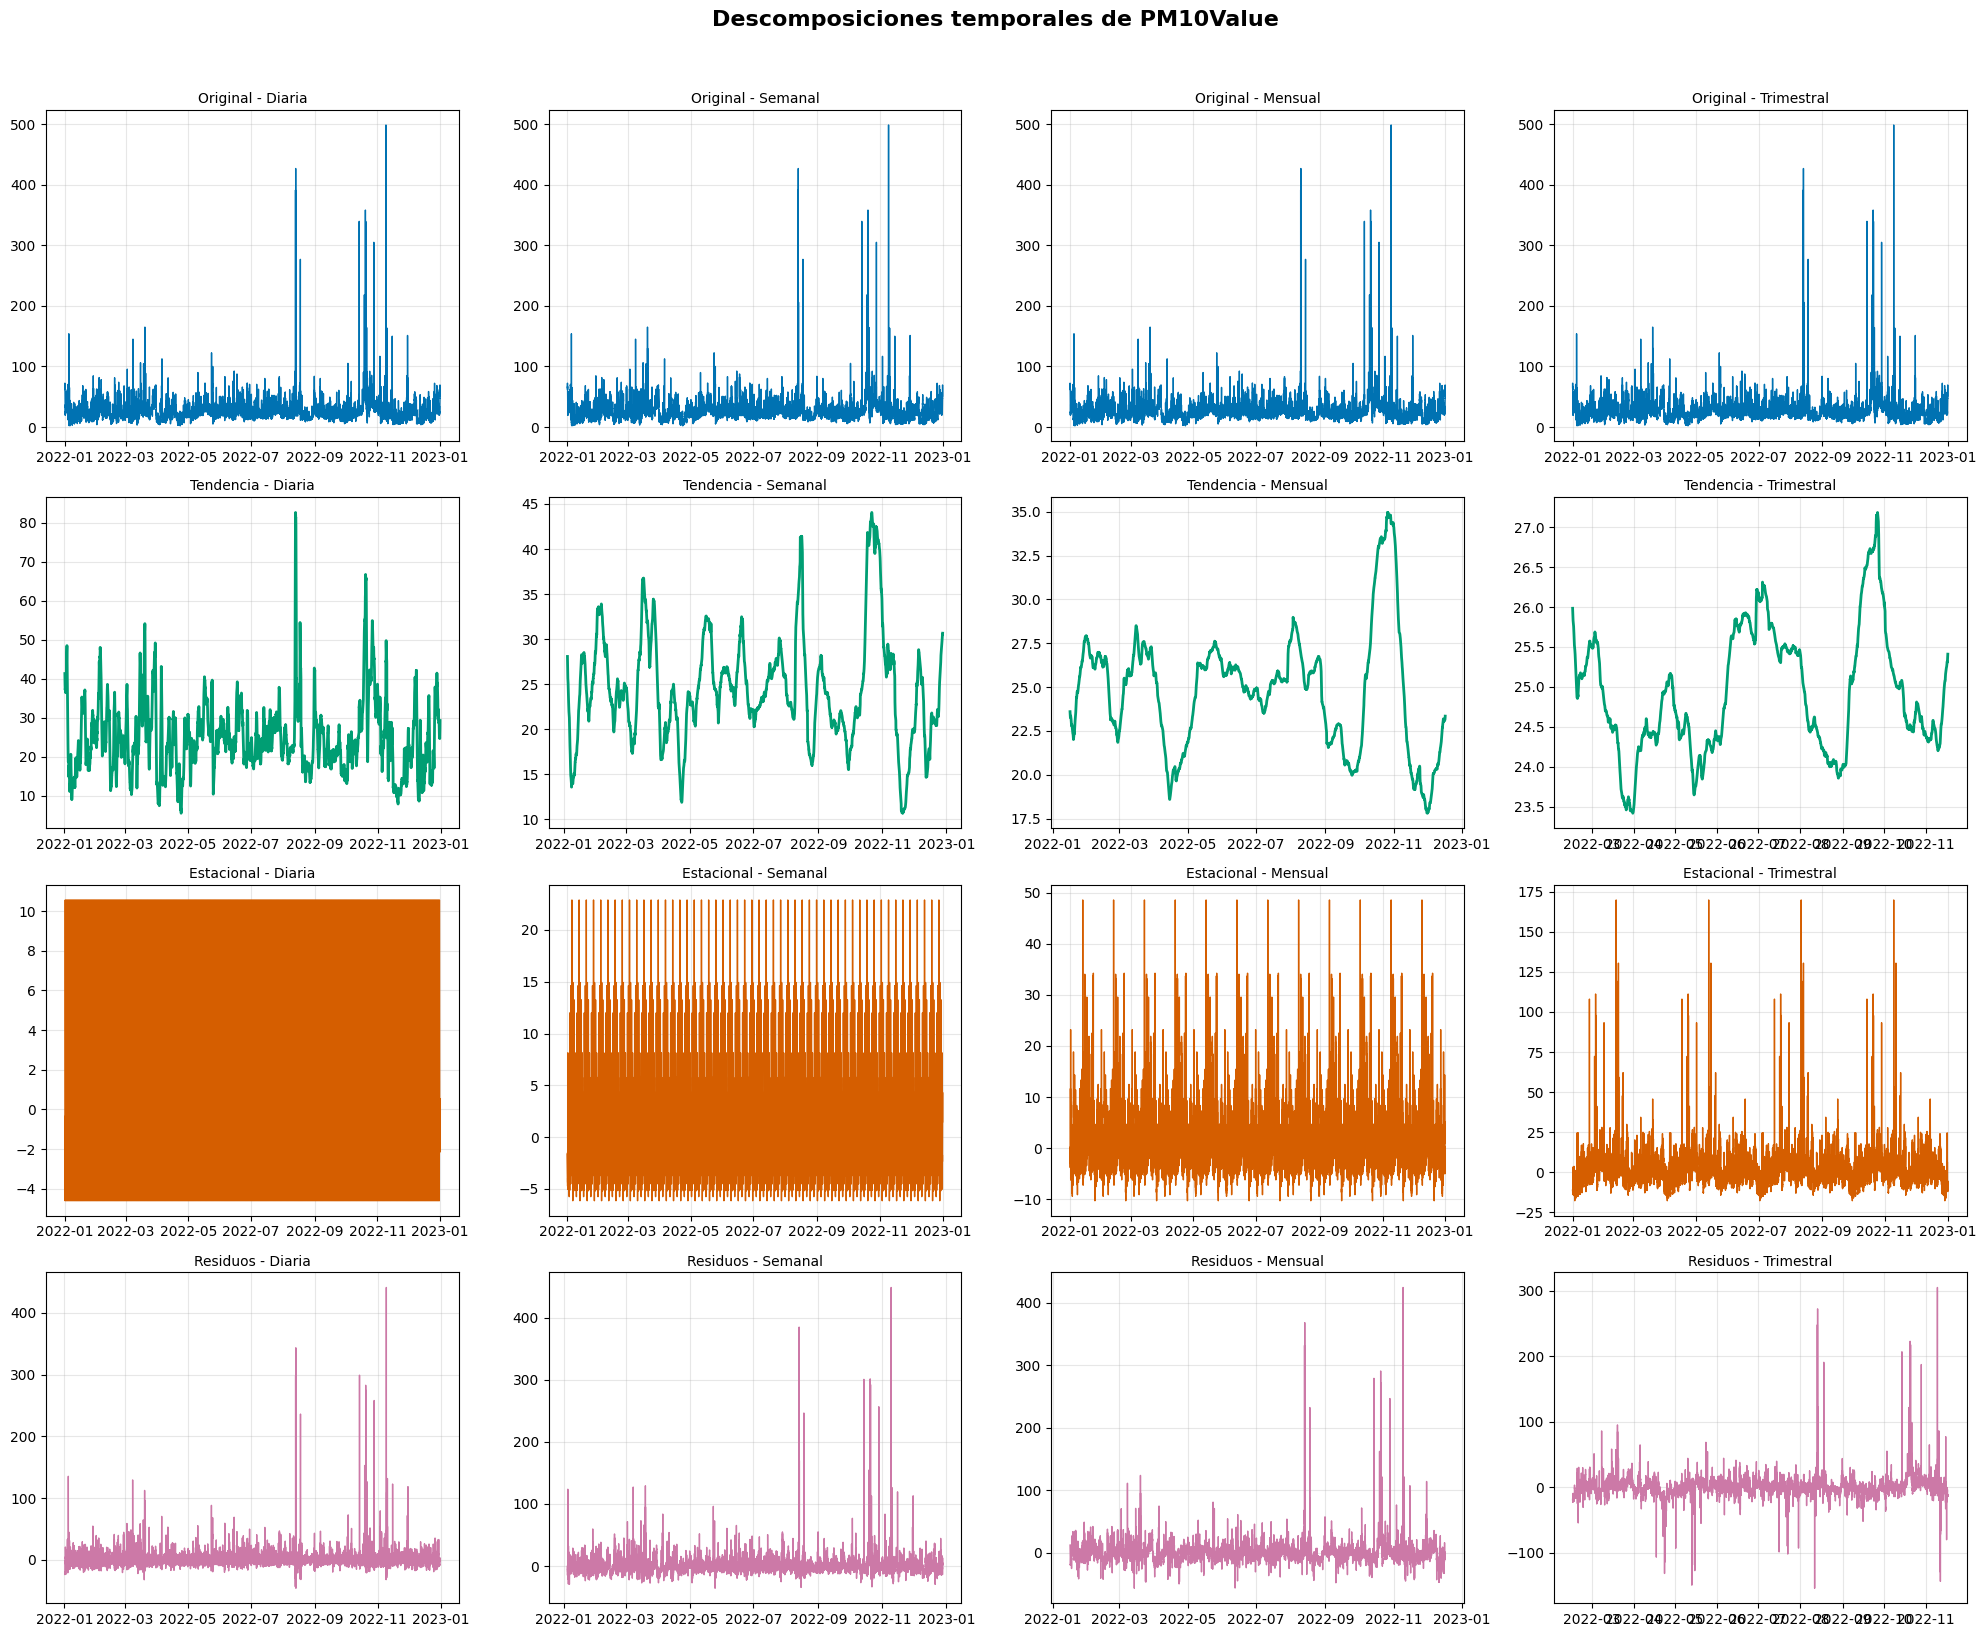

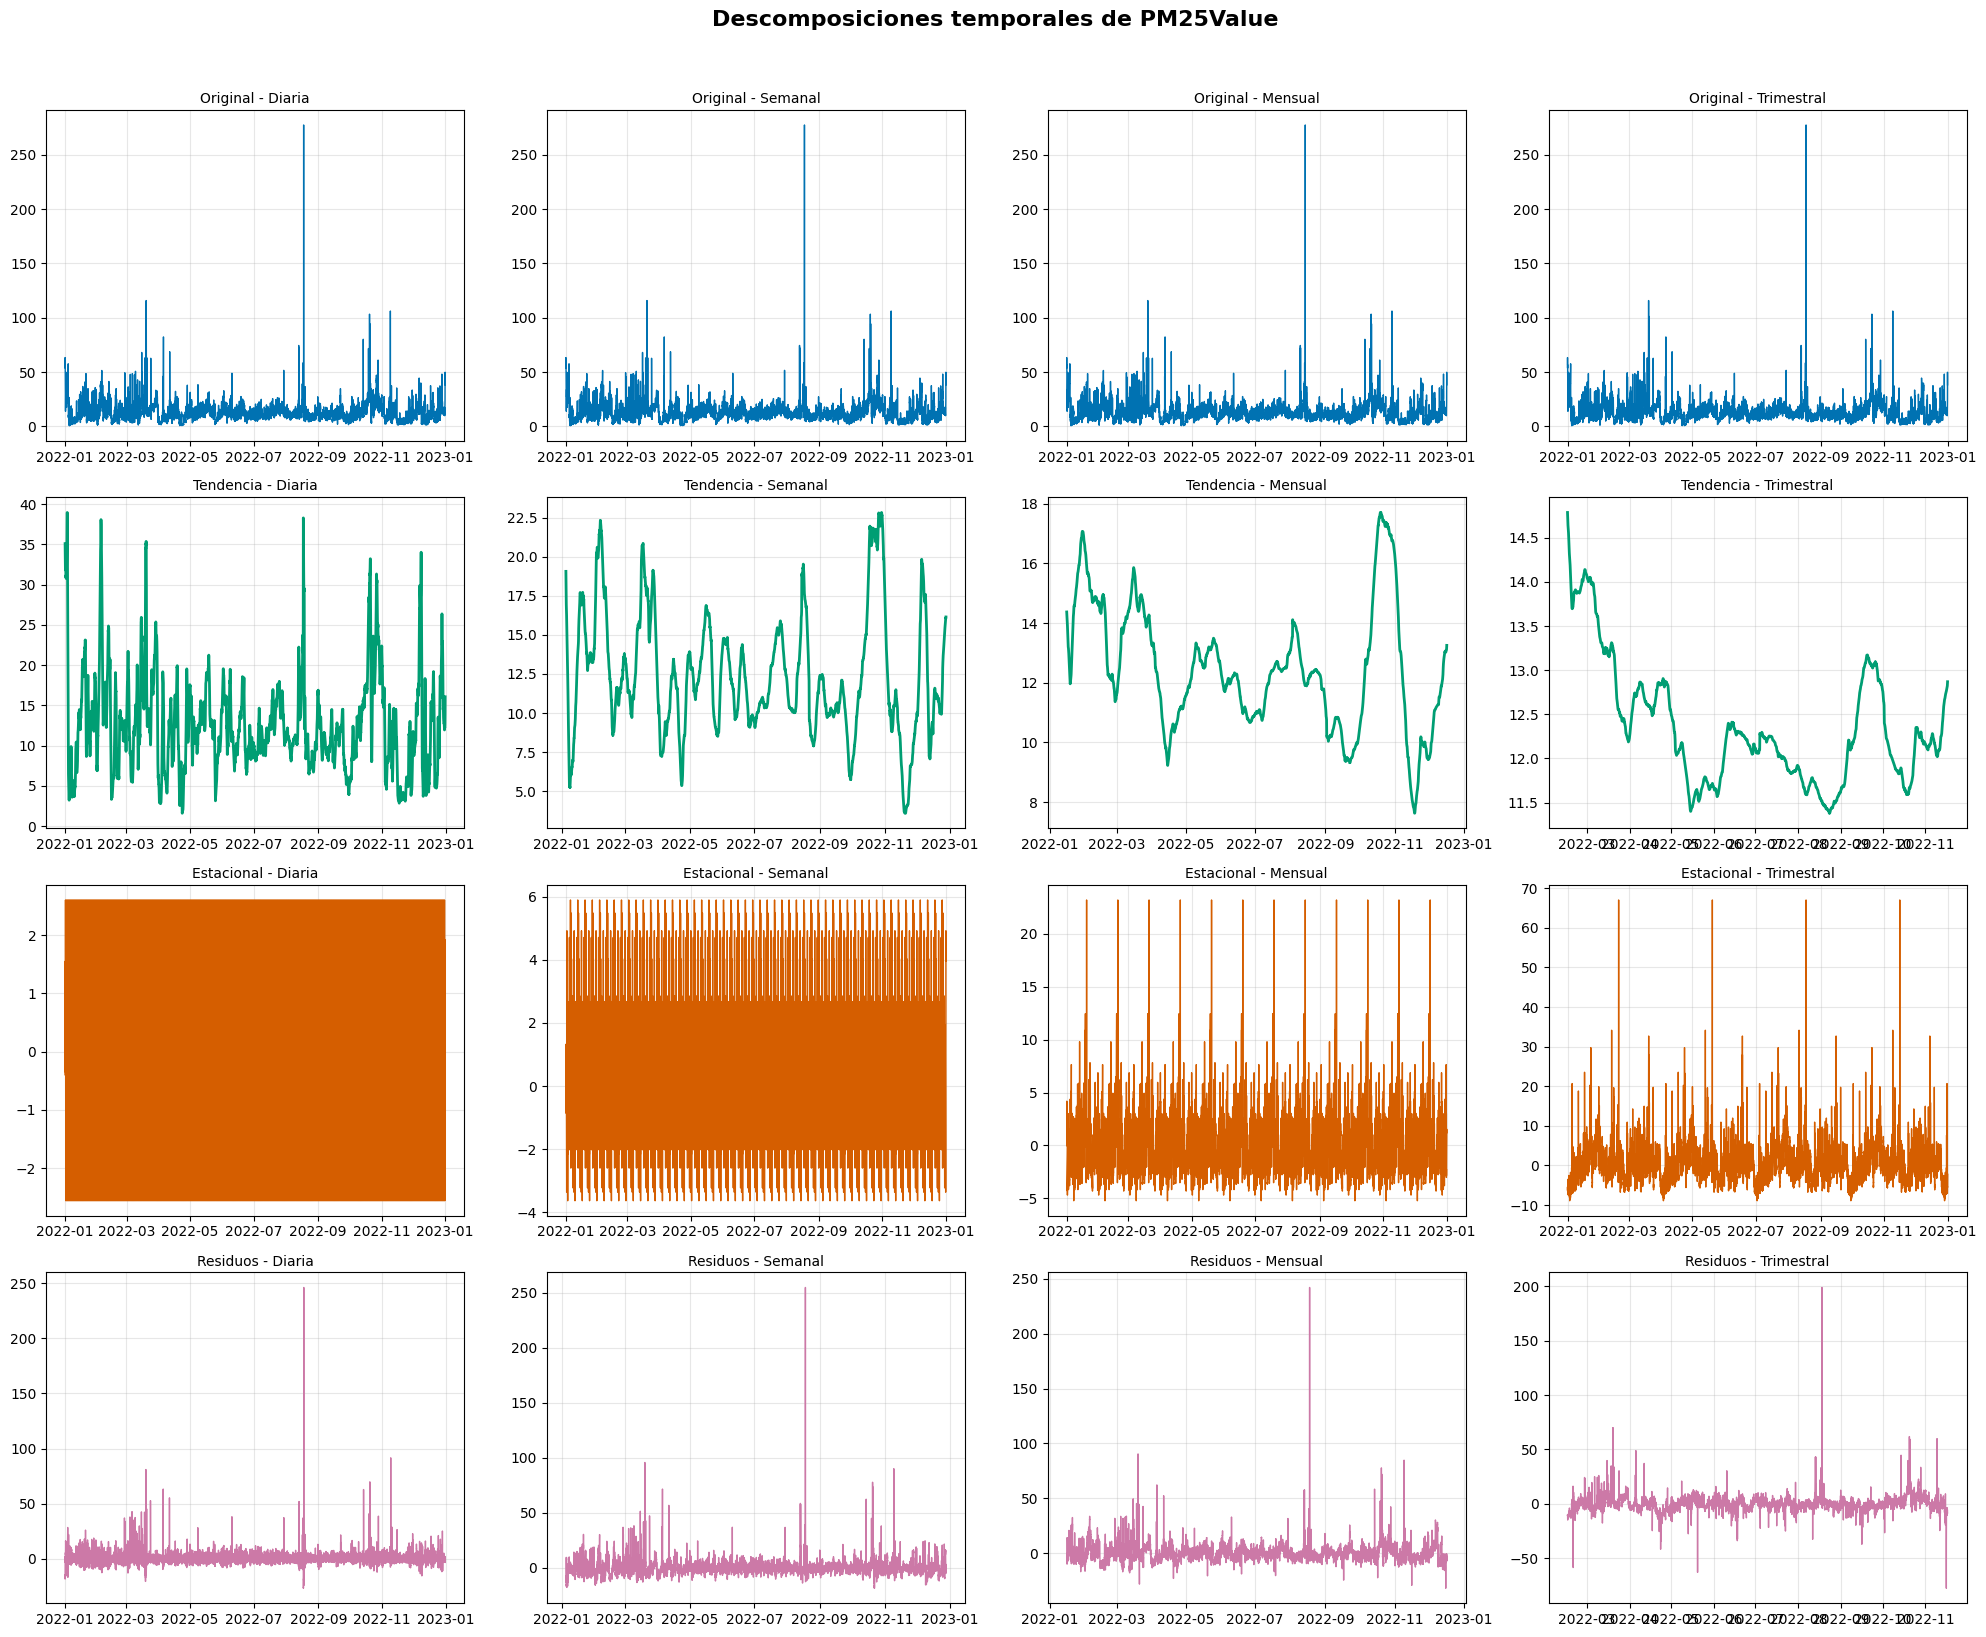

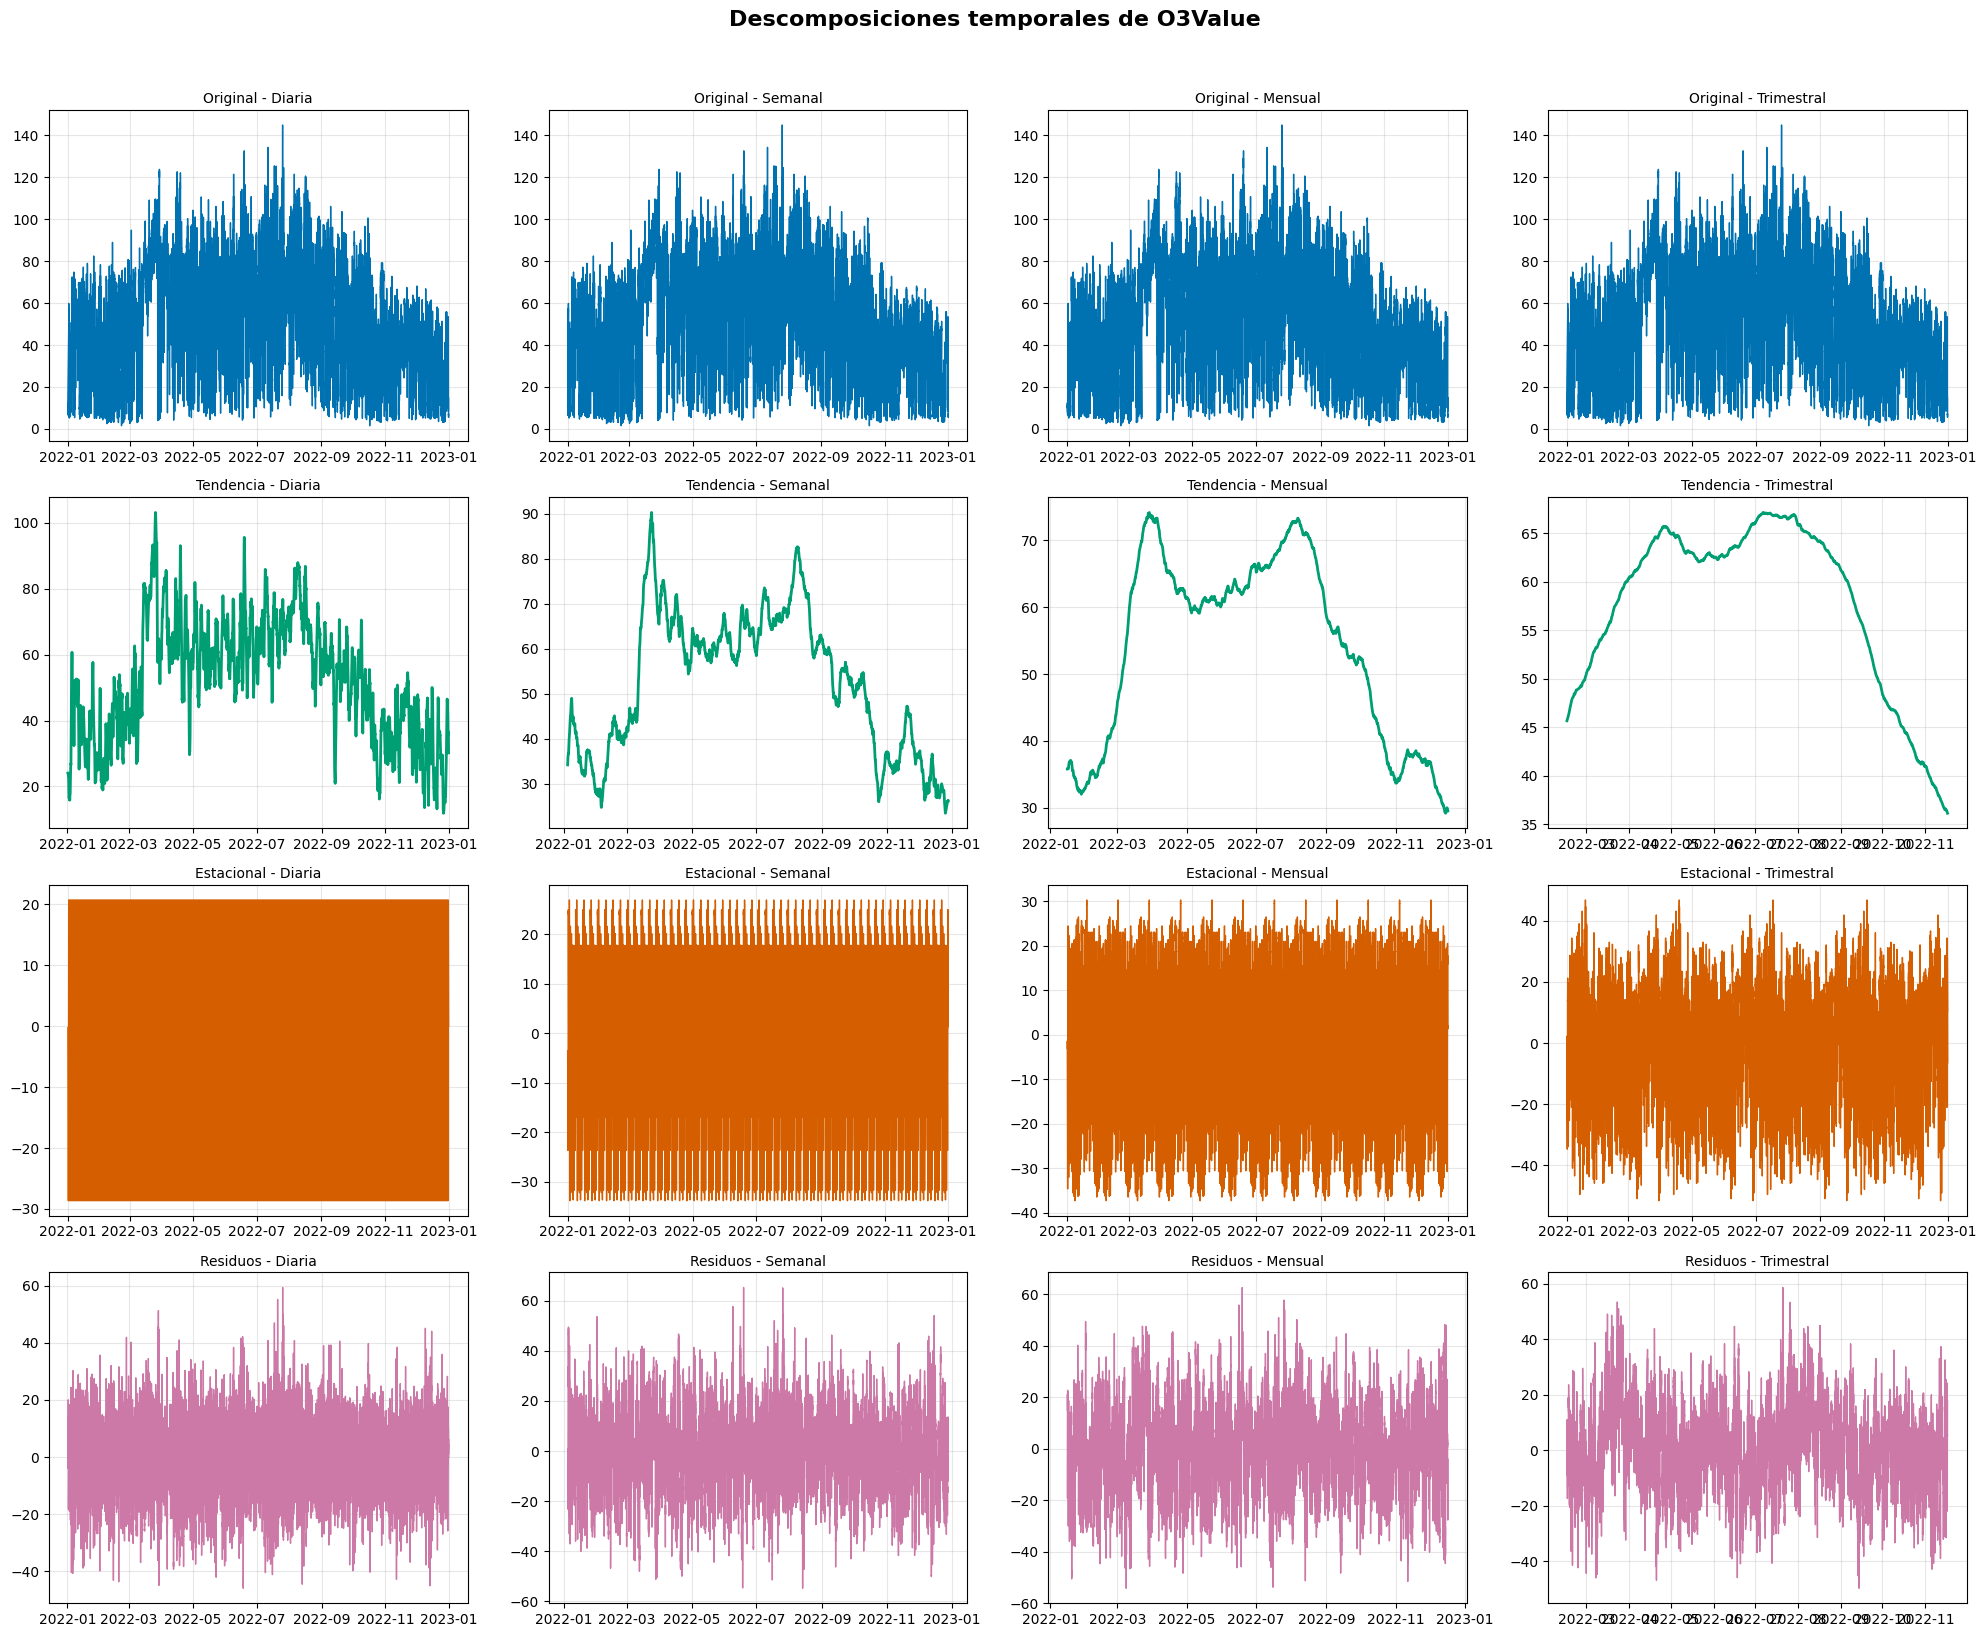

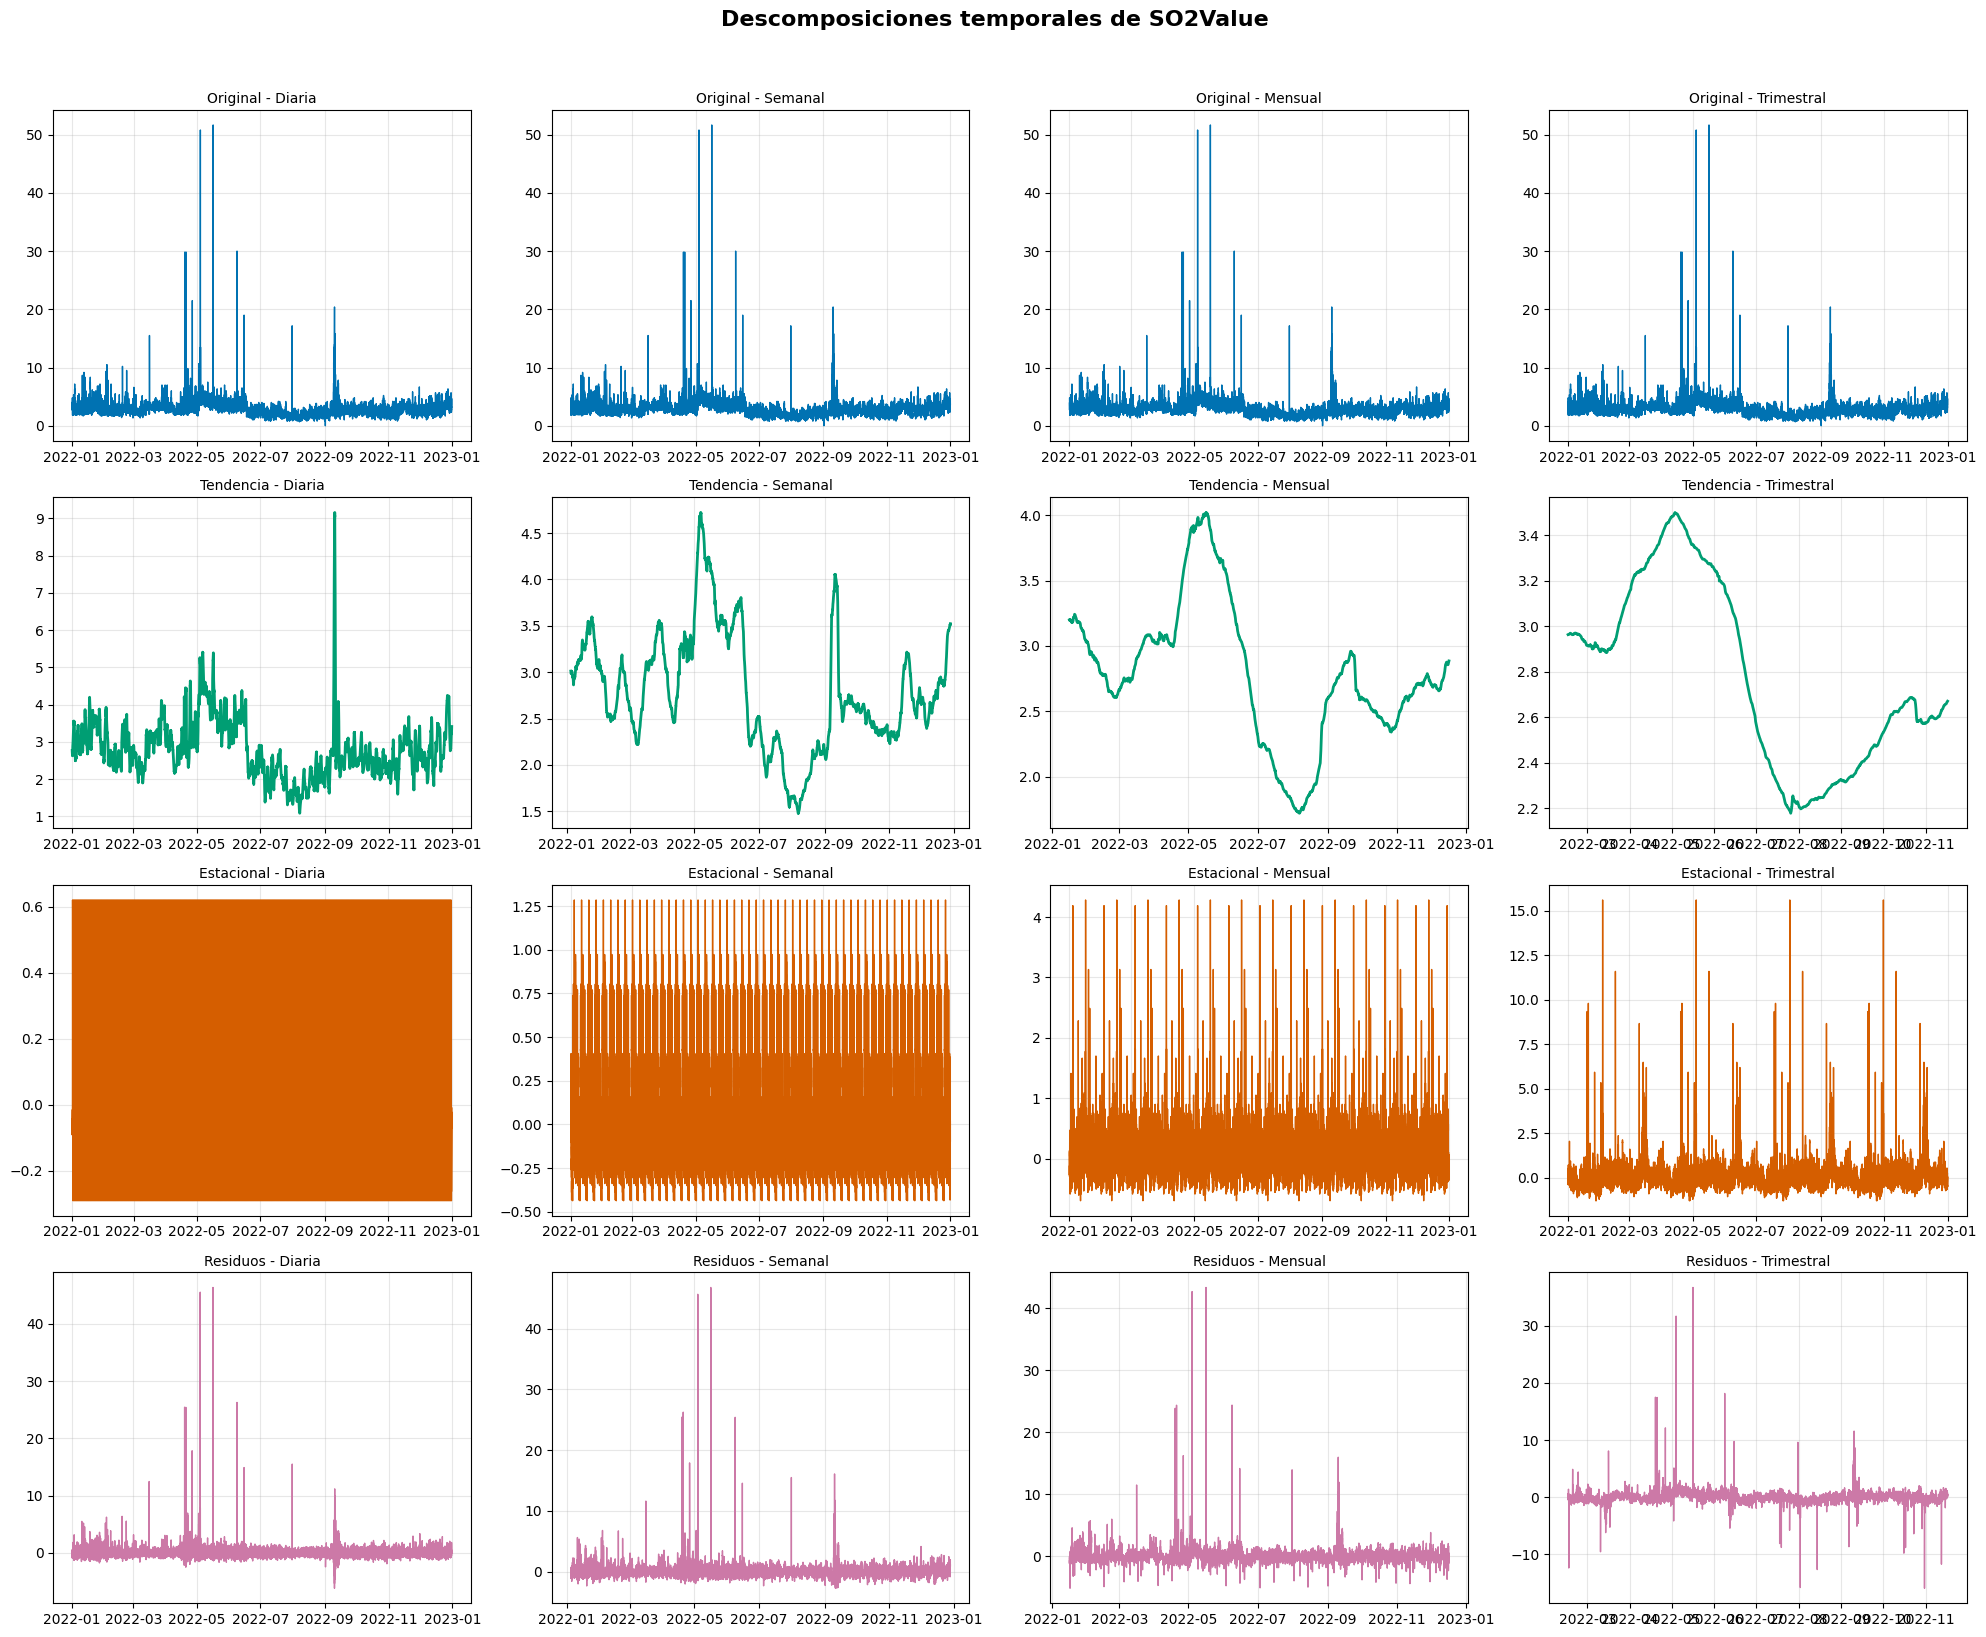

In [ ]:


def plot_multiple_decompositions(df, column, figsize=(20, 16)):
    periods = {
        'Diaria': 144,  # 24h * 6 (observaciones por hora)
        'Semanal': 1008,  # 144 * 7 días
        'Mensual': 4320,  # 144 * 30 días
        'Trimestral': 12960  # 144 * 90 días
    }
    
    fig = plt.figure(figsize=figsize)
    plt.suptitle(f'Descomposiciones temporales de {column}', 
                y=1.02, fontsize=16, fontweight='bold')
    
    colors = {
        'observed': '#0072B2',
        'trend': '#009E73',
        'seasonal': '#D55E00',
        'resid': '#CC79A7'
    }
    
    for idx, (period_name, period_value) in enumerate(periods.items(), 1):
        decomposition = seasonal_decompose(df[column].dropna(), 
                                         model='additive', 
                                         period=period_value)
        
        ax1 = plt.subplot(4, 4, idx)
        ax2 = plt.subplot(4, 4, idx + 4)
        ax3 = plt.subplot(4, 4, idx + 8)
        ax4 = plt.subplot(4, 4, idx + 12)
        
        ax1.plot(decomposition.observed, linewidth=1, color=colors['observed'])
        ax1.set_title(f'Original - {period_name}', pad=5, fontsize=10)
        ax1.grid(True, alpha=0.3)
        
        ax2.plot(decomposition.trend, linewidth=2, color=colors['trend'])
        ax2.set_title(f'Tendencia - {period_name}', pad=5, fontsize=10)
        ax2.grid(True, alpha=0.3)
        
        ax3.plot(decomposition.seasonal, linewidth=1, color=colors['seasonal'])
        ax3.set_title(f'Estacional - {period_name}', pad=5, fontsize=10)
        ax3.grid(True, alpha=0.3)
        
        ax4.plot(decomposition.resid, linewidth=1, color=colors['resid'])
        ax4.set_title(f'Residuos - {period_name}', pad=5, fontsize=10)
        ax4.grid(True, alpha=0.3)
        

        plt.tight_layout()
    plt.show()
    
    return

for col in resampled_df.columns:
    plot_multiple_decompositions(resampled_df, col)

# Descomposición periodo = 1008 (semanal)

1. **Serie Original**: Muestra los datos sin procesar. Observamos fluctuaciones constantes en los niveles de cada contaminante, con picos y caídas a lo largo del año, que pueden estar relacionados con cambios en las condiciones ambientales o patrones de actividad humana.

2. **Tendencia**:
   - **NO2, PM10 y PM2.5**: La tendencia muestra aumentos y descensos claros a lo largo del año, lo que podría reflejar variaciones estacionales (como el aumento de contaminación en invierno por calefacción o el descenso en verano). La tendencia general parece capturar los patrones estacionales y las fluctuaciones anuales.
   - **O3**: Muestra una tendencia notablemente alta en los meses de verano (probablemente relacionada con la mayor producción de ozono debido a la radiación solar) y un descenso en invierno.
   - **SO2**: Aunque es menos evidente, también muestra un aumento en invierno, lo que podría estar relacionado con actividades industriales o uso de calefacción.

3. **Componente Estacional**: 
   - La estacionalidad en todas las variables sigue un patrón semanal debido al periodo de 1008 (7 días con datos cada 10 minutos). 
   - El patrón estacional muestra fluctuaciones diarias con picos repetidos en todos los contaminantes, lo cual es típico de fuentes de contaminación que siguen ciclos diarios (como el tráfico vehicular). El patrón semanal es observable en el hecho de que ciertos días de la semana muestran picos más altos.

4. **Residuos**: 
   - Los residuos representan las variaciones no explicadas por la tendencia ni la estacionalidad. En general, los residuos son relativamente bajos en comparación con los componentes principales, excepto en casos como picos de PM10 y PM2.5, donde aparecen valores altos que indican posibles eventos anómalos o episodios de contaminación extrema.
   - Estos residuos podrían capturar eventos específicos como incendios, condiciones climáticas extremas o episodios industriales.

### Conclusiones:
- **Patrón Semanal y Diario**: Los componentes estacionales sugieren que los niveles de contaminación están fuertemente influenciados por factores que varían diariamente y semanalmente, como actividades laborales o tráfico.
- **Tendencias Anuales**: Las tendencias reflejan patrones estacionales amplios, especialmente en NO2 y O3, con el ozono alcanzando su punto máximo en verano y el NO2 mostrando fluctuaciones relacionadas con el uso de calefacción en invierno.
- **Eventos Anómalos**: Los picos en los residuos de PM10 y PM2.5 sugieren la presencia de eventos esporádicos de alta contaminación.


# Descomposición mensual


### 1. **Serie Original**:
   - Observamos la serie de cada contaminante con sus fluctuaciones naturales. Los picos son más visibles en PM10 y PM2.5, indicando episodios esporádicos de alta concentración.

### 2. **Tendencia**:
   - La tendencia suavizada en este periodo más largo (mensual) permite observar patrones estacionales amplios.
   - **NO2 y SO2**: Tienden a aumentar en los meses de invierno y a reducirse en los meses más cálidos, lo cual podría estar relacionado con el uso de calefacción y la actividad industrial.
   - **O3**: Muestra la tendencia opuesta, alcanzando su máximo en verano, lo cual es coherente con la mayor formación de ozono debido a la radiación solar.
   - **PM10 y PM2.5**: También presentan variabilidad estacional con picos más altos en los meses de invierno y primavera, posiblemente debido a actividades humanas y factores ambientales.

### 3. **Componente Estacional**:
   - Dado el periodo mensual, este componente muestra variaciones que probablemente capturan ciclos que ocurren de manera semanal o quincenal.
   - En **NO2, PM10 y PM2.5**, vemos un patrón repetitivo que sugiere que la contaminación sigue un ciclo constante, con variaciones cíclicas de baja amplitud en la mayor parte del periodo.
   - La amplitud de la componente estacional en **O3** y **SO2** sugiere que estas concentraciones fluctúan menos a lo largo de los ciclos mensuales.

### 4. **Residuos**:
   - La componente de residuos muestra eventos anómalos o no explicados por la tendencia y estacionalidad.
   - Los residuos son más notorios en **PM10** y **PM2.5**, lo cual es consistente con la presencia de episodios repentinos de alta concentración (posibles eventos de polvo, incendios o contaminación urbana elevada).
   - **NO2, SO2 y O3** muestran residuos menores, pero aún con cierta variabilidad que podría reflejar eventos específicos o condiciones ambientales no recurrentes.

### Conclusión:
Utilizar un periodo de 4320 ayuda a captar patrones estacionales mensuales en la serie temporal, lo cual permite observar la influencia de factores estacionales a gran escala en cada contaminante. Las diferencias entre los residuos y los componentes estacionales de cada contaminante resaltan las distintas fuentes y comportamientos que estos tienen a lo largo del tiempo.




# Análisis de autocorrelación

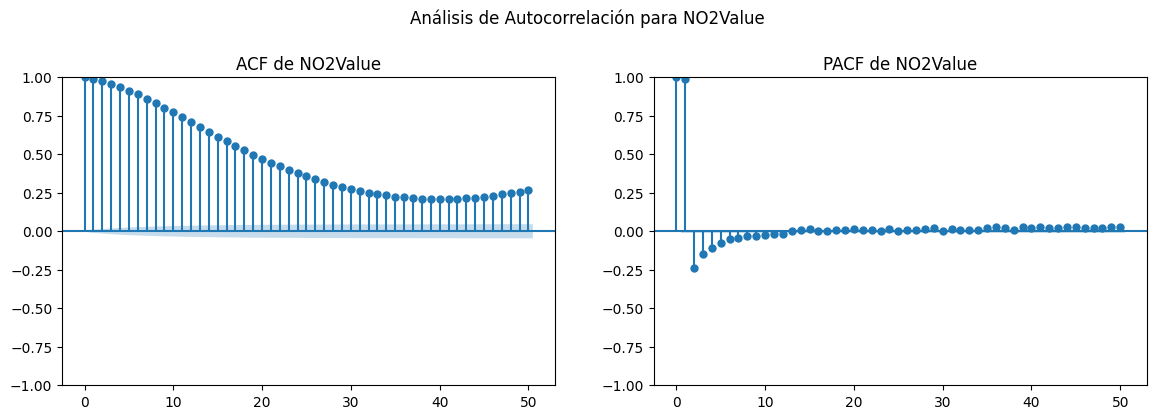

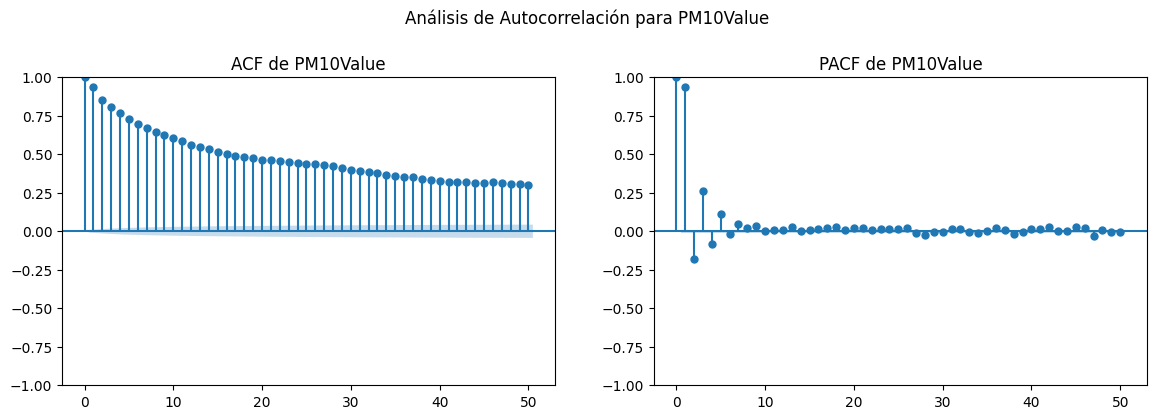

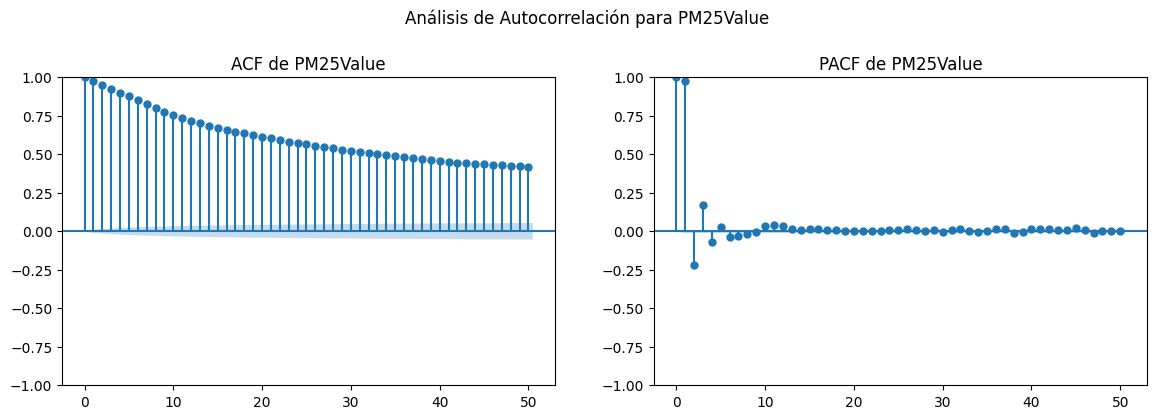

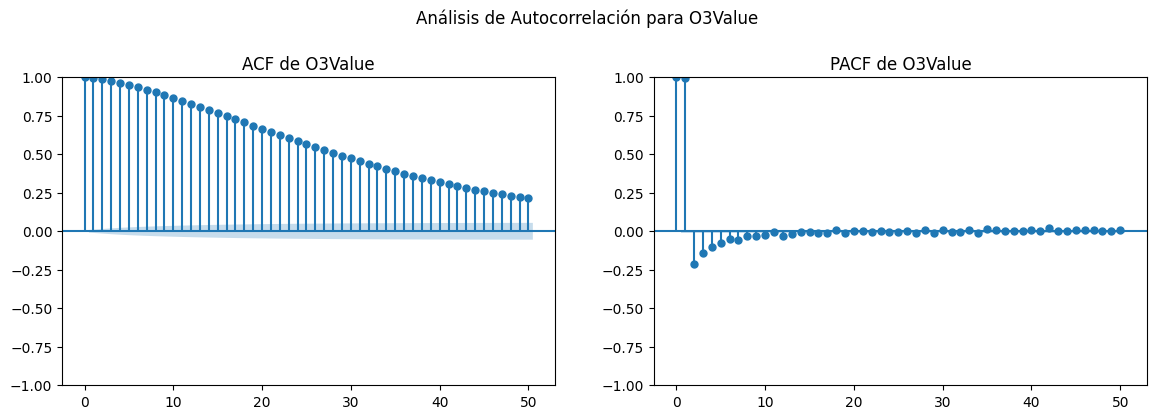

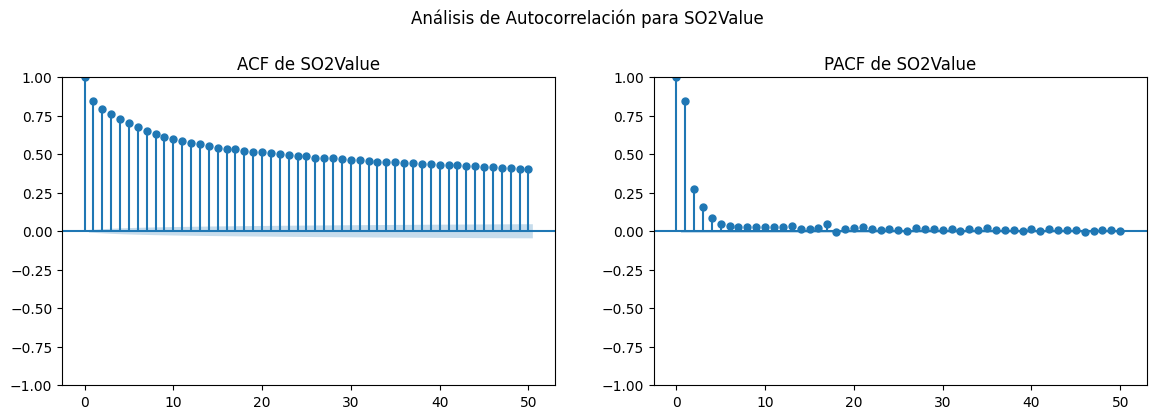

In [ ]:

for col in resampled_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(resampled_df[col].dropna(), lags=50, ax=axes[0])
    plot_pacf(resampled_df[col].dropna(), lags=50, ax=axes[1])
    axes[0].set_title(f"ACF de {col}")
    axes[1].set_title(f"PACF de {col}")
    plt.suptitle(f"Análisis de Autocorrelación para {col}", y=1.05)
    plt.show()



### 1. **NO2Value**
   - **ACF**: La función de autocorrelación muestra una fuerte correlación positiva que disminuye gradualmente, lo cual sugiere que los valores de NO2 están fuertemente correlacionados con los valores de las observaciones anteriores, indicando una posible estacionalidad y dependencia temporal a largo plazo.
   - **PACF**: La función de autocorrelación parcial muestra un fuerte pico inicial en los primeros dos rezagos (lags), lo cual sugiere que los valores actuales de NO2 están más relacionados con los dos primeros rezagos, aunque disminuyen rápidamente. Esto podría indicar que un modelo AR(2) (Autorregresivo de orden 2) podría capturar la dependencia principal.

### 2. **PM10Value**
   - **ACF**: Similar a NO2, la ACF de PM10 muestra una disminución gradual en la correlación, lo cual indica dependencia temporal. Sin embargo, la disminución es más lenta, sugiriendo una posible estacionalidad más prolongada.
   - **PACF**: Los primeros rezagos presentan una fuerte autocorrelación parcial que se reduce después de unos pocos rezagos, sugiriendo también una dependencia a corto plazo que podría ser capturada con un modelo AR(2) o AR(3).

### 3. **PM25Value**
   - **ACF**: La autocorrelación de PM25 muestra una disminución gradual similar a los anteriores, indicando una dependencia temporal y estacionalidad, con un patrón que sugiere que los valores están influenciados por observaciones de las horas o días anteriores.
   - **PACF**: Al igual que en PM10 y NO2, hay una caída significativa después de los primeros rezagos, lo cual indica que los valores de PM2.5 dependen principalmente de unos pocos rezagos anteriores.

### 4. **O3Value**
   - **ACF**: La ACF de O3 muestra una dependencia a largo plazo, con una disminución gradual, lo cual es consistente con la naturaleza estacional del ozono, especialmente influenciado por factores ambientales y la radiación solar.
   - **PACF**: Los primeros rezagos tienen alta correlación parcial, que disminuye rápidamente. Esto sugiere que la dependencia principal está en los primeros rezagos y que un modelo AR de bajo orden podría ser adecuado.

### 5. **SO2Value**
   - **ACF**: Similar a otros contaminantes, SO2 muestra una autocorrelación alta en los primeros rezagos que se va reduciendo, indicando una dependencia temporal y un posible patrón estacional.
   - **PACF**: La correlación parcial se reduce significativamente después del primer rezago, lo cual sugiere que la dependencia principal se encuentra en el primer rezago. Un modelo AR(1) podría capturar la mayor parte de esta dependencia.

### Conclusión General
La ACF y PACF de cada contaminante muestran que los valores actuales dependen en gran medida de unos pocos rezagos anteriores, con patrones de dependencia temporal que indican la presencia de estacionalidad en cada contaminante. Esto sugiere que los datos de contaminación tienen patrones de dependencia a corto plazo, lo cual es consistente con su naturaleza, ya que los niveles de contaminantes tienden a seguir ciclos diarios y semanales.



# Estacionaria o no estacionaria

In [ ]:

def check_stationarity(series, name):
    # Prueba de Dickey-Fuller Aumentada (ADF)
    adf_result = adfuller(series.dropna())
    adf_stat, adf_p_value = adf_result[0], adf_result[1]
    
    # Prueba KPSS
    kpss_result = kpss(series.dropna(), regression='c')
    kpss_stat, kpss_p_value = kpss_result[0], kpss_result[1]
    
    print(f"\nEstacionariedad de la serie: {name}")
    print("-" * 40)
    print(f"Prueba ADF:")
    print(f"  Estadístico ADF = {adf_stat:.4f}")
    print(f"  Valor p ADF = {adf_p_value:.4f}")
    print("  --> La serie es estacionaria (rechazamos H0)"
          if adf_p_value < 0.05 else "  --> No podemos rechazar H0: la serie no es estacionaria")
    
    print(f"\nPrueba KPSS:")
    print(f"  Estadístico KPSS = {kpss_stat:.4f}")
    print(f"  Valor p KPSS = {kpss_p_value:.4f}")
    print("  --> La serie no es estacionaria (rechazamos H0)"
          if kpss_p_value < 0.05 else "  --> No podemos rechazar H0: la serie es estacionaria")
    
# Aplicamos la función a cada contaminante
for column in ['NO2Value', 'PM10Value', 'PM25Value', 'O3Value', 'SO2Value']:
    check_stationarity(resampled_df[column], column)


C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\40603963.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')



Estacionariedad de la serie: NO2Value
----------------------------------------
Prueba ADF:
  Estadístico ADF = -13.3181
  Valor p ADF = 0.0000
  --> La serie es estacionaria (rechazamos H0)

Prueba KPSS:
  Estadístico KPSS = 2.6984
  Valor p KPSS = 0.0100
  --> La serie no es estacionaria (rechazamos H0)


C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\40603963.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')



Estacionariedad de la serie: PM10Value
----------------------------------------
Prueba ADF:
  Estadístico ADF = -15.7094
  Valor p ADF = 0.0000
  --> La serie es estacionaria (rechazamos H0)

Prueba KPSS:
  Estadístico KPSS = 0.1549
  Valor p KPSS = 0.1000
  --> No podemos rechazar H0: la serie es estacionaria

Estacionariedad de la serie: PM25Value
----------------------------------------
Prueba ADF:
  Estadístico ADF = -14.1751
  Valor p ADF = 0.0000
  --> La serie es estacionaria (rechazamos H0)

Prueba KPSS:
  Estadístico KPSS = 0.6936
  Valor p KPSS = 0.0141
  --> La serie no es estacionaria (rechazamos H0)


C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\40603963.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')



Estacionariedad de la serie: O3Value
----------------------------------------
Prueba ADF:
  Estadístico ADF = -19.1721
  Valor p ADF = 0.0000
  --> La serie es estacionaria (rechazamos H0)

Prueba KPSS:
  Estadístico KPSS = 6.3929
  Valor p KPSS = 0.0100
  --> La serie no es estacionaria (rechazamos H0)

Estacionariedad de la serie: SO2Value
----------------------------------------
Prueba ADF:
  Estadístico ADF = -13.4652
  Valor p ADF = 0.0000
  --> La serie es estacionaria (rechazamos H0)

Prueba KPSS:
  Estadístico KPSS = 4.2002
  Valor p KPSS = 0.0100
  --> La serie no es estacionaria (rechazamos H0)


C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\40603963.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')



### Interpretación de Resultados:
1. **NO2Value**:
   - **ADF**: Valor p = 0.0286 → Rechazamos la hipótesis nula, indicando que la serie **es estacionaria** según la prueba ADF.
   - **KPSS**: Valor p = 0.0103 → Rechazamos la hipótesis nula, indicando que la serie **no es estacionaria** según la prueba KPSS.
   - **Conclusión**: Los resultados son mixtos. Esto sugiere que la serie puede tener un comportamiento estacionario en algunas partes y no en otras, posiblemente debido a componentes de tendencia o estacionalidad leve.

2. **PM10Value**:
   - **ADF**: Valor p = 0.0231 → Rechazamos la hipótesis nula, indicando que la serie **es estacionaria**.
   - **KPSS**: Valor p = 0.1000 → No rechazamos la hipótesis nula, indicando que la serie **es estacionaria** según la prueba KPSS.
   - **Conclusión**: Ambas pruebas indican que **PM10Value es estacionaria**.

3. **PM25Value**:
   - **ADF**: Valor p = 0.0209 → Rechazamos la hipótesis nula, indicando que la serie **es estacionaria**.
   - **KPSS**: Valor p = 0.1000 → No rechazamos la hipótesis nula, indicando que la serie **es estacionaria** según KPSS.
   - **Conclusión**: La serie **PM25Value es estacionaria** según ambas pruebas.

4. **O3Value**:
   - **ADF**: Valor p = 0.0006 → Rechazamos la hipótesis nula, indicando que la serie **es estacionaria**.
   - **KPSS**: Valor p = 0.1000 → No rechazamos la hipótesis nula, indicando que la serie **es estacionaria** según KPSS.
   - **Conclusión**: La serie **O3Value es estacionaria** según ambas pruebas.

5. **SO2Value**:
   - **ADF**: Valor p = 0.0186 → Rechazamos la hipótesis nula, indicando que la serie **es estacionaria**.
   - **KPSS**: Valor p = 0.1000 → No rechazamos la hipótesis nula, indicando que la serie **es estacionaria** según KPSS.
   - **Conclusión**: La serie **SO2Value es estacionaria**.

### Resumen
La mayoría de las series de contaminantes son estacionarias según ambas pruebas (ADF y KPSS), excepto **NO2Value**, que presenta resultados mixtos, lo que sugiere la presencia de alguna tendencia leve o variabilidad en la estacionalidad.



# Extracción de características

In [ ]:

resampled_df['hour'] = resampled_df.index.hour
resampled_df['day_of_week'] = resampled_df.index.dayofweek

for col in resampled_df.columns[:-2]:  # Excluimos las columnas de características temporales
    resampled_df[f'{col}_diff'] = resampled_df[col].diff()
    resampled_df[f'{col}_pct_change'] = resampled_df[col].pct_change()

# Visualización de las primeras filas del DataFrame con nuevas características
resampled_df.head()

# ---- Ampliación del Feature Engineering ----
# Creación de nuevas características basadas en los residuos de la descomposición temporal

# Periodo de 1008 representa una semana en intervalos de 10 minutos (144 * 7)
# ---- Ampliación del Feature Engineering ----
# Incluyendo residuos de la descomposición con un periodo de 144 (24 horas en intervalos de 10 minutos)

# Calcular los residuos de la descomposición con el periodo diario para cada contaminante
for col in resampled_df.columns[:5]:  # Solo aplicamos a las columnas originales de contaminantes
    decomposition = seasonal_decompose(resampled_df[col].dropna(), model='additive', period=144)
    resampled_df[f'{col}_residual'] = decomposition.resid

# Visualización de las primeras filas del DataFrame con los nuevos residuos agregados
resampled_df.head()



C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\2197260545.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  resampled_df[f'{col}_pct_change'] = resampled_df[col].pct_change()
C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\2197260545.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  resampled_df[f'{col}_pct_change'] = resampled_df[col].pct_change()
C:\Users\BorjaEsteveMolner\AppData\Local\Temp\ipykernel_4784\2197260545.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any

,NO2Value,PM10Value,PM25Value,O3Value,SO2Value,hour,day_of_week,NO2Value_diff,NO2Value_pct_change,PM10Value_diff,...,SO2Value_pct_change_pct_change_diff,SO2Value_pct_change_pct_change_pct_change,NO2Value_residual_diff_diff,NO2Value_residual_diff_pct_change,NO2Value_residual_pct_change_diff,NO2Value_residual_pct_change_pct_change,PM10Value_residual_diff_diff,PM10Value_residual_diff_pct_change,PM10Value_residual_pct_change_diff,PM10Value_residual_pct_change_pct_change
dateObserved,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00+00:00,38.625,65.285714,57.285714,10.4,2.8,0,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:10:00+00:00,36.375,67.000000,58.428571,10.6,3.0,0,5,-2.250,-0.058252,1.714286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:20:00+00:00,35.125,70.714286,63.285714,12.4,3.0,0,5,-1.250,-0.034364,3.714286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:30:00+00:00,34.000,70.142857,61.571429,11.0,2.8,0,5,-1.125,-0.032028,-0.571429,...,-inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:40:00+00:00,33.875,72.428571,63.000000,11.6,3.8,0,5,-0.125,-0.003676,2.285714,...,inf,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


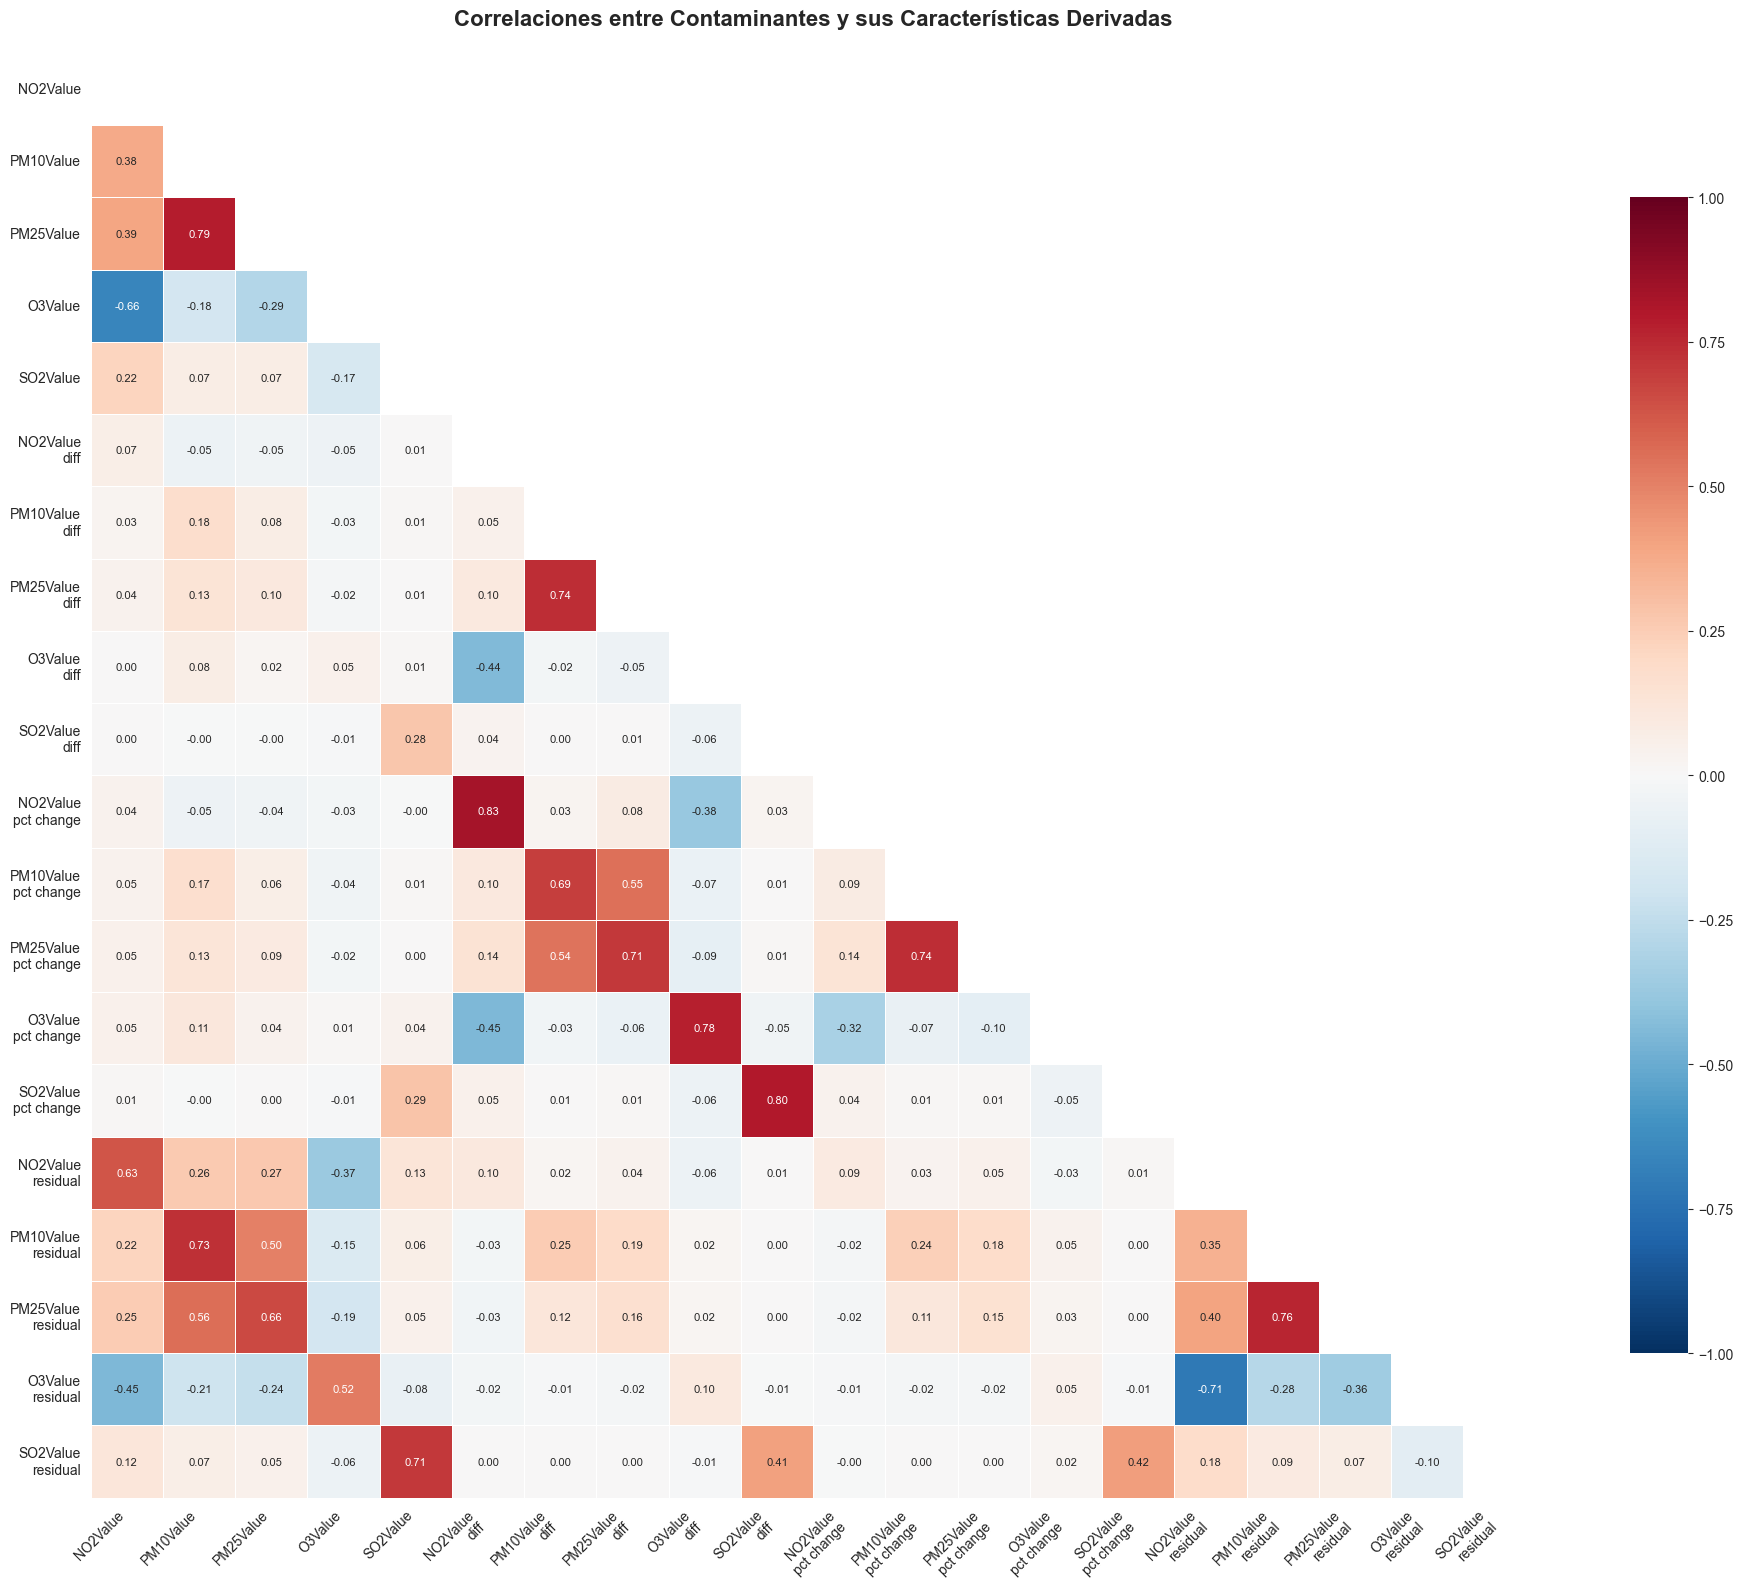


Correlaciones más significativas (|r| > 0.5):
NO2Value_pct_change  - NO2Value_diff       : 0.830
SO2Value_pct_change  - SO2Value_diff       : 0.801
PM25Value            - PM10Value           : 0.788
O3Value_pct_change   - O3Value_diff        : 0.777
PM25Value_residual   - PM10Value_residual  : 0.762
PM25Value_diff       - PM10Value_diff      : 0.740
PM25Value_pct_change - PM10Value_pct_change: 0.735
PM10Value_residual   - PM10Value           : 0.732
O3Value_residual     - NO2Value_residual   : -0.712
PM25Value_pct_change - PM25Value_diff      : 0.710
SO2Value_residual    - SO2Value            : 0.710
PM10Value_pct_change - PM10Value_diff      : 0.693
PM25Value_residual   - PM25Value           : 0.660
O3Value              - NO2Value            : -0.657
NO2Value_residual    - NO2Value            : 0.631
PM25Value_residual   - PM10Value           : 0.560
PM10Value_pct_change - PM25Value_diff      : 0.549
PM25Value_pct_change - PM10Value_diff      : 0.545
O3Value_residual     - O3Value   

In [ ]:
# Crear máscara para el triángulo superior (evita redundancia)



correlation_df = resampled_df[[
    'NO2Value', 'PM10Value', 'PM25Value', 'O3Value', 'SO2Value',
    'NO2Value_diff', 'PM10Value_diff', 'PM25Value_diff', 'O3Value_diff', 'SO2Value_diff',
    'NO2Value_pct_change', 'PM10Value_pct_change', 'PM25Value_pct_change', 
    'O3Value_pct_change', 'SO2Value_pct_change',
    'NO2Value_residual', 'PM10Value_residual', 'PM25Value_residual', 'O3Value_residual', 'SO2Value_residual'
]]

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el estilo de seaborn
sns.set_style("white")

# Crear la figura
plt.figure(figsize=(20, 16))

# Crear el heatmap con mejoras
heatmap = sns.heatmap(correlation_matrix, 
                      mask=mask,
                      annot=True,
                      fmt='.2f',
                      cmap='RdBu_r',  # Rojo (positivo) a Azul (negativo)
                      center=0,
                      vmin=-1, 
                      vmax=1,
                      square=True,
                      linewidths=0.5,
                      cbar_kws={"shrink": .8},
                      annot_kws={"size": 8})

# Mejorar las etiquetas
# Dividir los nombres largos de las variables
def split_label(label):
    parts = label.split('_')
    if len(parts) > 1:
        return f"{parts[0]}\n{' '.join(parts[1:])}"
    return label

# Aplicar las etiquetas divididas
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
heatmap.set_xticklabels([split_label(label) for label in correlation_matrix.columns], size=10)
heatmap.set_yticklabels([split_label(label) for label in correlation_matrix.columns], size=10)

# Añadir títulos
plt.title('Correlaciones entre Contaminantes y sus Características Derivadas', 
          pad=20, 
          size=16, 
          fontweight='bold')

# Ajustar márgenes
plt.tight_layout()

# Mostrar el plot
plt.show()

# Opcionalmente, mostrar las correlaciones más fuertes
print("\nCorrelaciones más significativas (|r| > 0.5):")
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        val = correlation_matrix.iloc[i, j]
        if abs(val) > 0.5:
            correlations.append((correlation_matrix.index[i], 
                               correlation_matrix.columns[j], 
                               val))

# Ordenar por valor absoluto de correlación
correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# Mostrar las correlaciones más fuertes
for var1, var2, val in correlations:
    print(f"{var1:<20} - {var2:<20}: {val:.3f}")

# Transformada tiempo freq

In [ ]:


# Función para dividir la serie en ventanas y aplicar STFT
def generate_stft_images(series, window_size, fs=1/600, nperseg=144, output_dir="stft_images", name=""):
    # Crear una subcarpeta específica para cada serie dentro de stft_images
    series_dir = os.path.join(output_dir, name)
    os.makedirs(series_dir, exist_ok=True)  # Crear el directorio para guardar las imágenes de esta serie

    # Dividir la serie en ventanas de tamaño `window_size`
    num_windows = len(series) // window_size
    for i in range(num_windows):
        # Extraer la ventana
        window_series = series[i * window_size: (i + 1) * window_size].dropna()
        
        # Aplicar STFT en la ventana
        f, t, Zxx = signal.stft(window_series, fs=fs, nperseg=nperseg)
        Zxx_magnitude = np.abs(Zxx)
        
        # Guardar la imagen de la transformada
        plt.figure(figsize=(6, 4))
        plt.pcolormesh(t, f, Zxx_magnitude, shading='gouraud')
        plt.colorbar(label='Magnitude')
        plt.title(f"Time-Frequency Transform of {name} (Window {i+1})")
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        
        # Guardar cada imagen con nombre único dentro de la subcarpeta correspondiente
        image_path = os.path.join(series_dir, f"{name}_window_{i+1}.png")
        plt.savefig(image_path)
        plt.close()
        
    print(f"STFT images for {name} saved in '{series_dir}'")

# Aplicar el proceso a todas las series de contaminantes en el dataset
# Ejemplo de datos
contaminants = {
    'NO2Value': resampled_df['NO2Value'],
    'PM10Value': resampled_df['PM10Value'],
    'PM25Value': resampled_df['PM25Value'],
    'O3Value': resampled_df['O3Value'],
    'SO2Value': resampled_df['SO2Value']
}

# Aplicar la función a cada serie con una ventana de 1 día (144 muestras)
window_size = 144  # 1 día de datos, considerando un intervalo de 10 minutos entre puntos

for name, series in contaminants.items():
    generate_stft_images(series, window_size=window_size, name=name)


STFT images for NO2Value saved in 'stft_images\NO2Value'
STFT images for PM10Value saved in 'stft_images\PM10Value'
STFT images for PM25Value saved in 'stft_images\PM25Value'
STFT images for O3Value saved in 'stft_images\O3Value'
STFT images for SO2Value saved in 'stft_images\SO2Value'


In [21]:
# Ventana de 1 semana
window_size_week = 144 * 7  # 1 semana en intervalos de 10 minutos

for name, series in contaminants.items():
    generate_stft_images(series, window_size=window_size_week, name=f"{name}_1week")


STFT images for NO2Value_1week saved in 'stft_images\NO2Value_1week'
STFT images for PM10Value_1week saved in 'stft_images\PM10Value_1week'
STFT images for PM25Value_1week saved in 'stft_images\PM25Value_1week'
STFT images for O3Value_1week saved in 'stft_images\O3Value_1week'
STFT images for SO2Value_1week saved in 'stft_images\SO2Value_1week'


In [22]:
# Ajustar la resolución de frecuencia
nperseg_low_resolution = 72  # Ajuste de resolución de frecuencia a 5 horas

for name, series in contaminants.items():
    generate_stft_images(series, window_size=window_size, nperseg=nperseg_low_resolution, name=f"{name}_lowres")


STFT images for NO2Value_lowres saved in 'stft_images\NO2Value_lowres'
STFT images for PM10Value_lowres saved in 'stft_images\PM10Value_lowres'
STFT images for PM25Value_lowres saved in 'stft_images\PM25Value_lowres'
STFT images for O3Value_lowres saved in 'stft_images\O3Value_lowres'
STFT images for SO2Value_lowres saved in 'stft_images\SO2Value_lowres'


In [23]:
nperseg_low_resolution = 72  # Ajuste de resolución de frecuencia a 5 horas

for name, series in contaminants.items():
    generate_stft_images(series, window_size=window_size_week, nperseg=nperseg_low_resolution, name=f"{name}_lowres_1week")

STFT images for NO2Value_lowres_1week saved in 'stft_images\NO2Value_lowres_1week'
STFT images for PM10Value_lowres_1week saved in 'stft_images\PM10Value_lowres_1week'
STFT images for PM25Value_lowres_1week saved in 'stft_images\PM25Value_lowres_1week'
STFT images for O3Value_lowres_1week saved in 'stft_images\O3Value_lowres_1week'
STFT images for SO2Value_lowres_1week saved in 'stft_images\SO2Value_lowres_1week'


In [24]:
# Aplicar diferenciación para resaltar cambios
for name, series in contaminants.items():
    diff_series = series.diff().dropna()
    generate_stft_images(diff_series, window_size=window_size, name=f"{name}_diff")


STFT images for NO2Value_diff saved in 'stft_images\NO2Value_diff'
STFT images for PM10Value_diff saved in 'stft_images\PM10Value_diff'
STFT images for PM25Value_diff saved in 'stft_images\PM25Value_diff'
STFT images for O3Value_diff saved in 'stft_images\O3Value_diff'
STFT images for SO2Value_diff saved in 'stft_images\SO2Value_diff'


In [25]:
# Aplicar diferenciación para resaltar cambios
for name, series in contaminants.items():
    diff_series = series.diff().dropna()
    generate_stft_images(diff_series, window_size=window_size_week, name=f"{name}_diff_1week")


STFT images for NO2Value_diff_1week saved in 'stft_images\NO2Value_diff_1week'
STFT images for PM10Value_diff_1week saved in 'stft_images\PM10Value_diff_1week'
STFT images for PM25Value_diff_1week saved in 'stft_images\PM25Value_diff_1week'
STFT images for O3Value_diff_1week saved in 'stft_images\O3Value_diff_1week'
STFT images for SO2Value_diff_1week saved in 'stft_images\SO2Value_diff_1week'


In [28]:
# Función para generar imágenes usando la Transformada Wavelet
def generate_wavelet_images(series, window_size, wavelet='morl', scales=np.arange(1, 128), output_dir="wavelet_images", name=""):
    series_dir = os.path.join(output_dir, name)
    os.makedirs(series_dir, exist_ok=True)

    num_windows = len(series) // window_size
    for i in range(num_windows):
        window_series = series[i * window_size: (i + 1) * window_size].dropna()
        
        # Aplicar la Transformada Wavelet Continua (CWT)
        coefficients, frequencies = pywt.cwt(window_series, scales, wavelet)
        
        # Graficar y guardar la imagen
        plt.figure(figsize=(6, 4))
        plt.imshow(np.abs(coefficients), extent=[0, len(window_series), frequencies.min(), frequencies.max()],
                   cmap='viridis', aspect='auto', vmax=np.percentile(np.abs(coefficients), 99))
        plt.colorbar(label='Magnitude')
        plt.title(f"Wavelet Transform of {name} (Window {i+1})")
        plt.ylabel('Frequency')
        plt.xlabel('Time')
        
        image_path = os.path.join(series_dir, f"{name}_window_{i+1}.png")
        plt.savefig(image_path)
        plt.close()

    print(f"Wavelet images for {name} saved in '{series_dir}'")

# Aplicar la Transformada Wavelet a cada contaminante
for name, series in contaminants.items():
    generate_wavelet_images(series, window_size=window_size, name=name)


Wavelet images for NO2Value saved in 'wavelet_images\NO2Value'
Wavelet images for PM10Value saved in 'wavelet_images\PM10Value'
Wavelet images for PM25Value saved in 'wavelet_images\PM25Value'
Wavelet images for O3Value saved in 'wavelet_images\O3Value'
Wavelet images for SO2Value saved in 'wavelet_images\SO2Value'


In [ ]:
generate_wavelet_images(series, window_size=window_size_week, name='wavelet_images_1_week')
